In [1]:
import numpy as np
import random
import time
import math
import random
import os
import sys
from datetime import datetime

# Notebook path
current_directory = os.getcwd()
# Get one behind for calling the other modules
root_directory = os.path.abspath(os.path.join(current_directory, '..'))
sys.path.append(root_directory)

#Network and measures
from to_get_data.net_construction_vis_measures import *
#Agrobiodiversity
from to_get_data.agrobiodiversity_data import *
#Classes
from model_class.UD import UD
from model_class.Variety import Variety

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parâmetros
N0 = 40  # Número inicial de UDs
V0 = 3   # Número médio inicial de variedades por UD
pm = 0.5 # Proporção de variedades herdadas da mãe
lambda_poisson = 4 # Média da distribuição de Poisson
p_birth = 0.3  # Probabilidade de gerar filhos por ciclo
p_death = 0.1  # Probabilidade de morte
t_max = 100  # Tempo máximo de simulação

# Equação para a população N(t)
def population(N, t, p_birth, lambda_poisson, p_death):
    dNdt = p_birth * lambda_poisson * N - p_death * N
    return dNdt

# Equação para o número médio de variedades V(t)
def varieties(V, t, p_birth, lambda_poisson):
    dVdt = p_birth * lambda_poisson * V
    return dVdt

# Vetor de tempo
t = np.linspace(0, t_max, 1000)

# Resolver as equações diferenciais
N = odeint(population, N0, t, args=(p_birth, lambda_poisson, p_death))
V = odeint(varieties, V0, t, args=(p_birth, lambda_poisson))

# Gráfico da solução numérica
plt.figure(figsize=(12, 6))

# População ao longo do tempo
plt.subplot(1, 2, 1)
plt.plot(t, N, label="População N(t)", color='blue')
plt.title("Evolução da População (N)")
plt.xlabel("Tempo")
plt.ylabel("População")
plt.grid(True)

# Variedades ao longo do tempo
plt.subplot(1, 2, 2)
plt.plot(t, V, label="Variedades V(t)", color='green')
plt.title("Evolução do Número Médio de Variedades (V)")
plt.xlabel("Tempo")
plt.ylabel("Número Médio de Variedades")
plt.grid(True)

plt.tight_layout()
plt.show()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\users\jsolm\appdata\local\programs\python\python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\jsolm\appdata\local\programs\python\python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\users\jsolm\appdata\local\programs\python\python39\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\jsolm\appdata\local\programs\python\python39\lib\site-packages\traitlets

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [6]:
#### Parameters for simulation
iniciais = 30 # Initial UD
prob_morte = 0.06 # Beta from the gutertz equation
media = 4 # Average children per UD
random.seed(42) # Random seed
t = 100 #steps of the simulation
UD.uds = {}

#### Initialization
## Comunidades
UD.uds = {}
comunidades_disponibles = [i for i in range(1, (int(iniciais) // 10) + 1) for _ in range(10)]
instancias_ud = []
print(comunidades_disponibles)
for id_ud in range(1, int(iniciais) + 1):
    instancias_ud.append(UD(id_ud, media, comunidades_disponibles.pop(0)))
## Variedades y repartirlas entre las comunidades
for id_ud, ud in UD.uds.items():
    for _ in range(5):
        ud.varieties.append(Variety())

comunidades_lista = [ud.community for ud in UD.uds.values()]

#histogram_communities(comunidades_lista)
    
#### Simulation
original_media = media
vivas = [int(iniciais)]
for i in range (1, (t)):
    uds_copy = dict(UD.uds) #As UDs existentes no tempo n
    any_ud_active = False # Flag to see if the simulation went to extintion
    alive = len([1 for id, ud in uds_copy.items() if ud.activa])
    if alive > 200 and (media == original_media): #or media == original_media-1):
        media -= 2
        print(media)
    elif alive < 150 and media < original_media:
        media = original_media
        print(media)
    for id_ud, ud in uds_copy.items():
        if ud.activa == True:
            any_ud_active = True
            ud.ter_filho()
            ud.buscar_ud(media, 50, True)
            ud.incrementar_idade()
            ud.death_probability(prob_morte)
    if not any_ud_active:
        print("acabo")
        break
     # Collecting data
    viv = len([ud for id, ud in uds_copy.items() if ud.activa])
    #mort = len([ud for id, ud in uds_copy.items() if not ud.activa])
    vivas.append(viv)
    #mortas.append(mort)
    #tempo.append(t)
    if i%100 == 0:
        print(f"tamos en tiempo {i} con vivas {viv}")
#comunidades_lista = [ud.community for ud in UD.uds.values()]
comunidades_lista = [ud.community for id, ud in uds_copy.items() if ud.activa]
print(len([ud for id, ud in uds_copy.items() if ud.activa]))
#histogram_communities(comunidades_lista)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
22


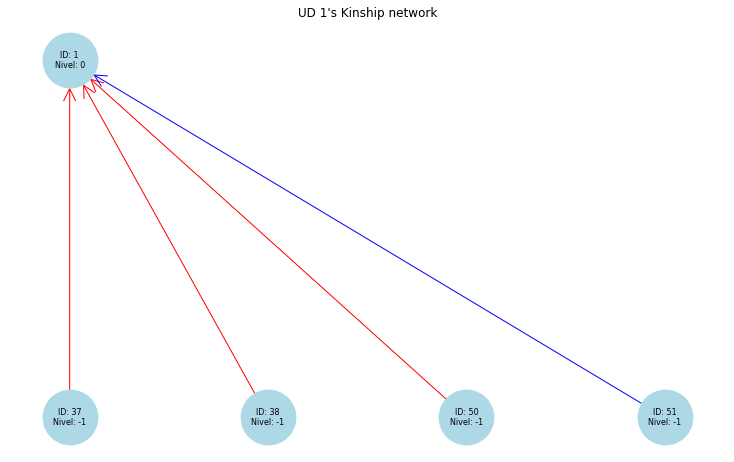

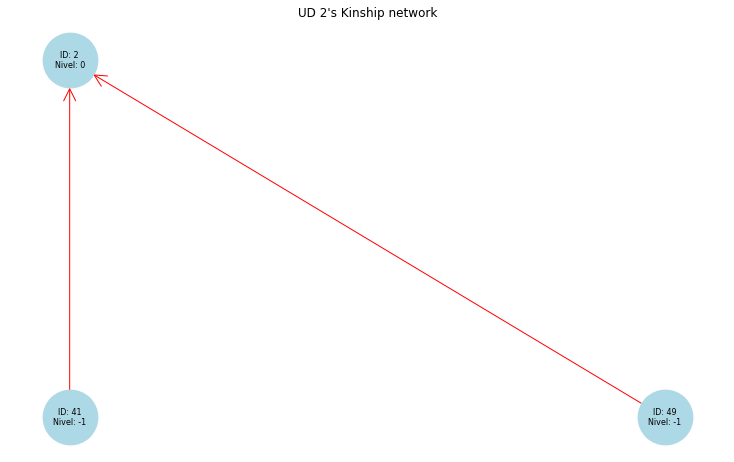

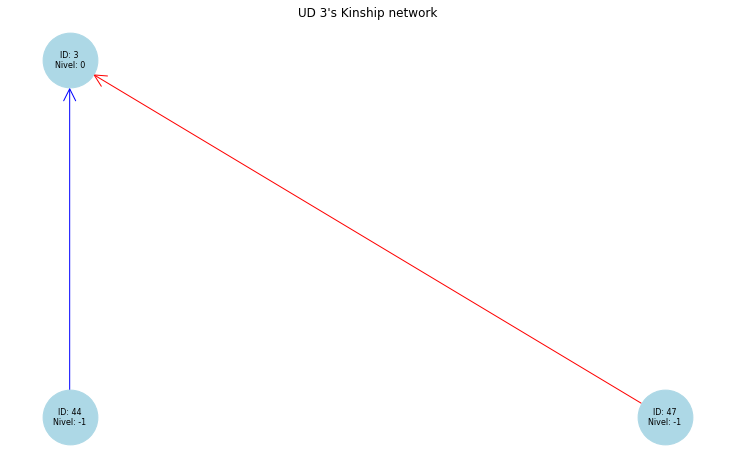

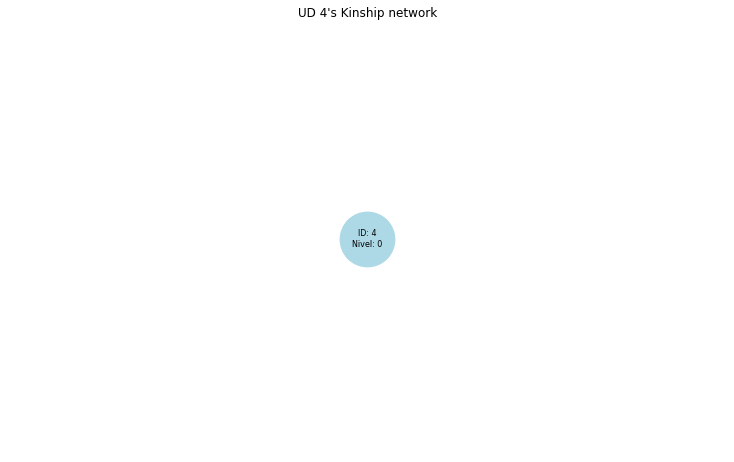

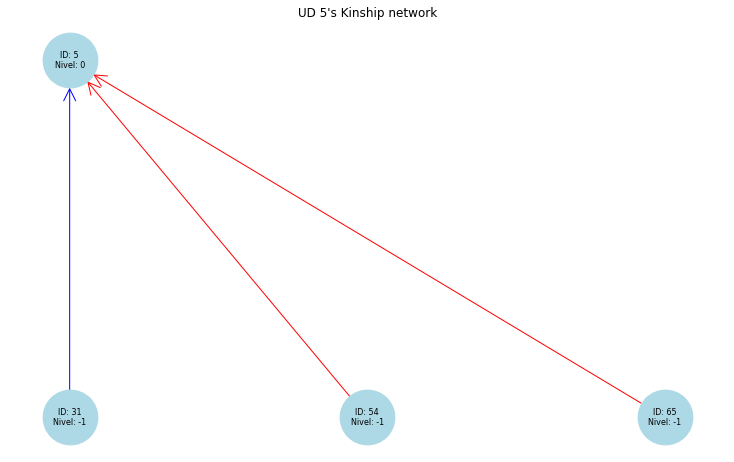

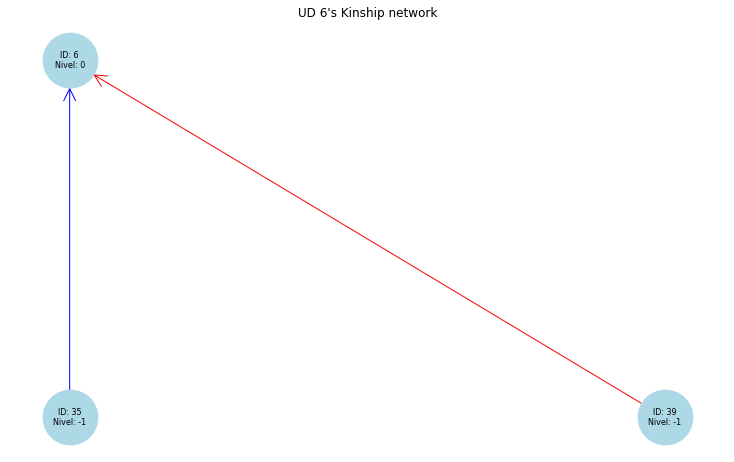

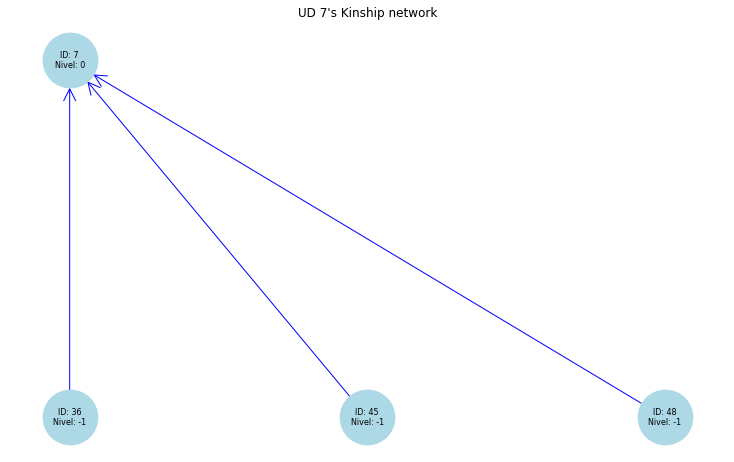

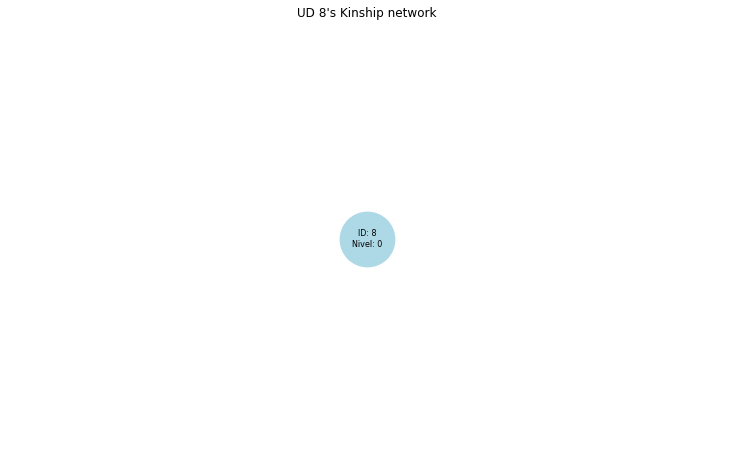

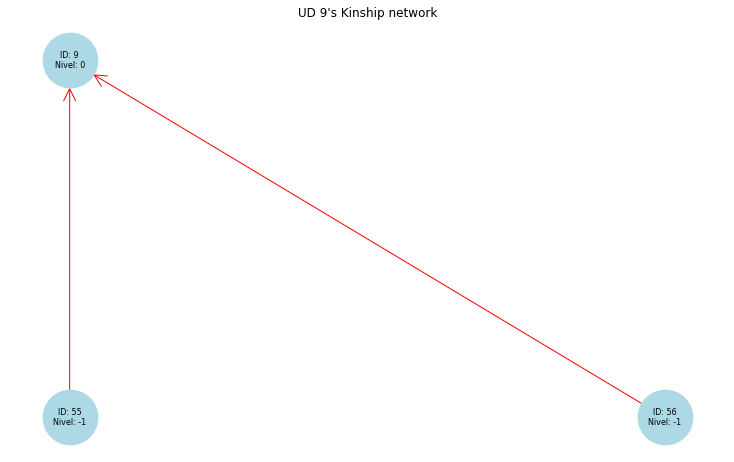

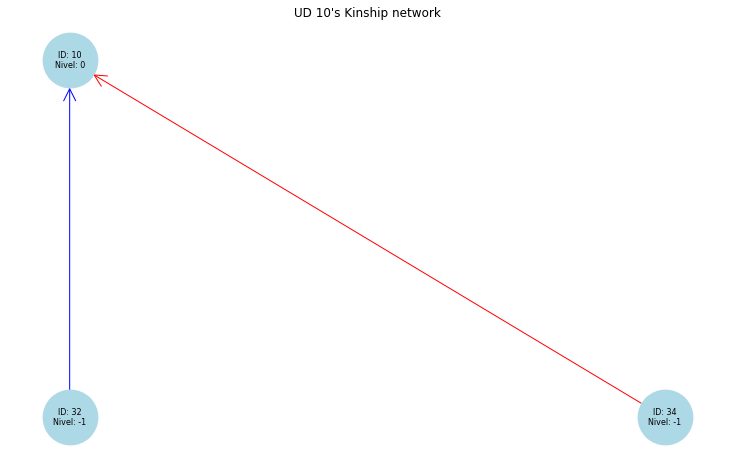

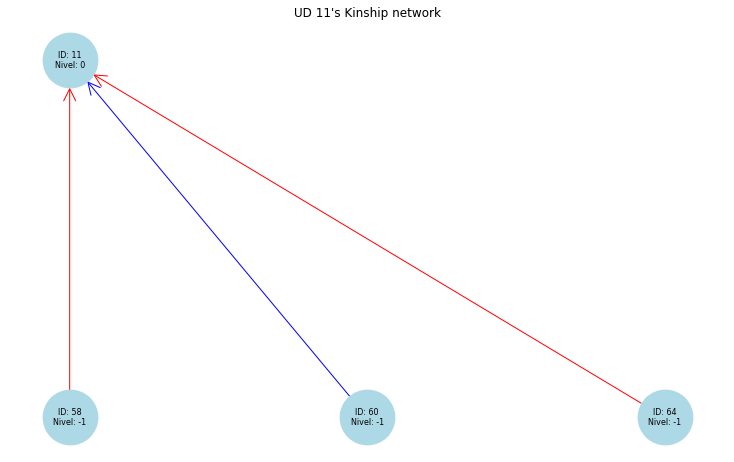

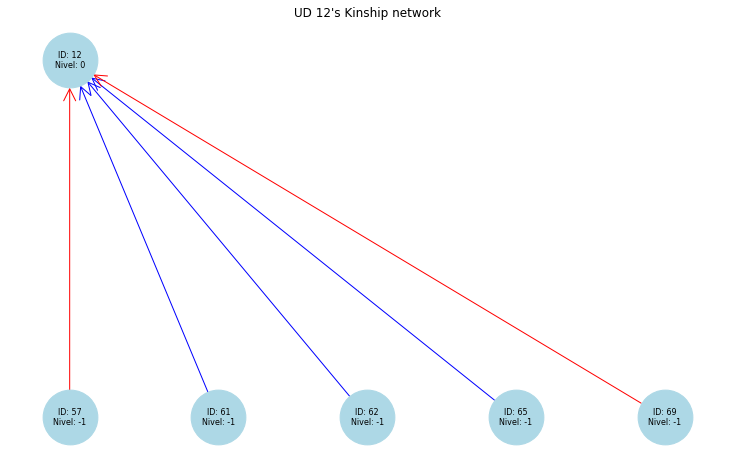

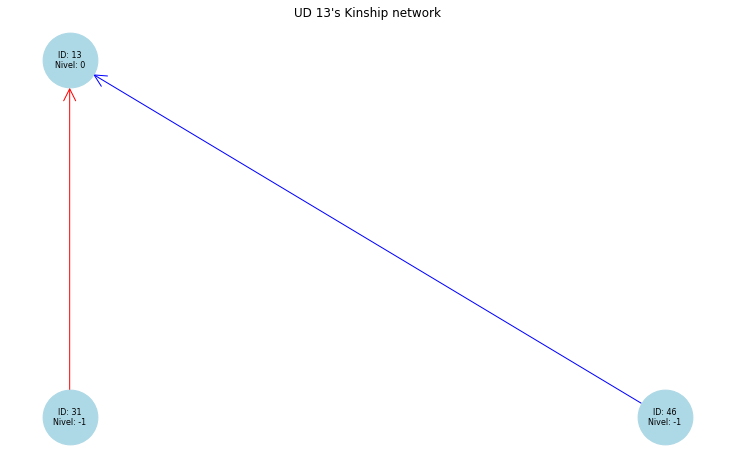

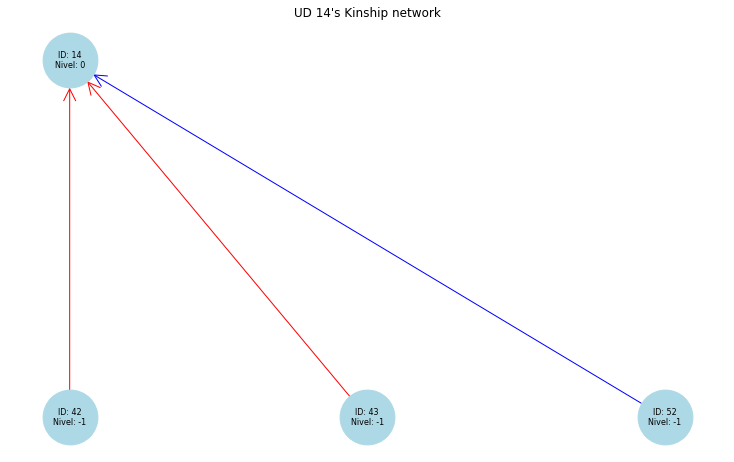

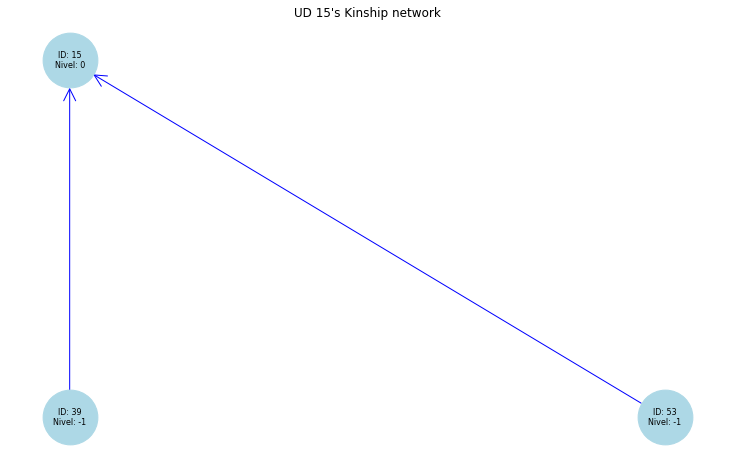

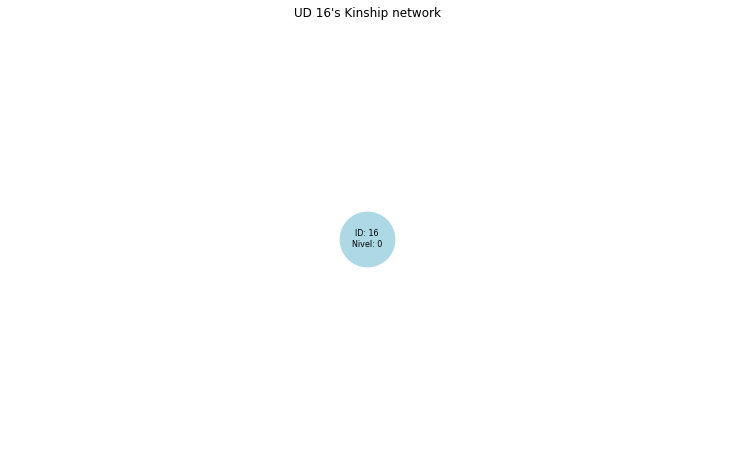

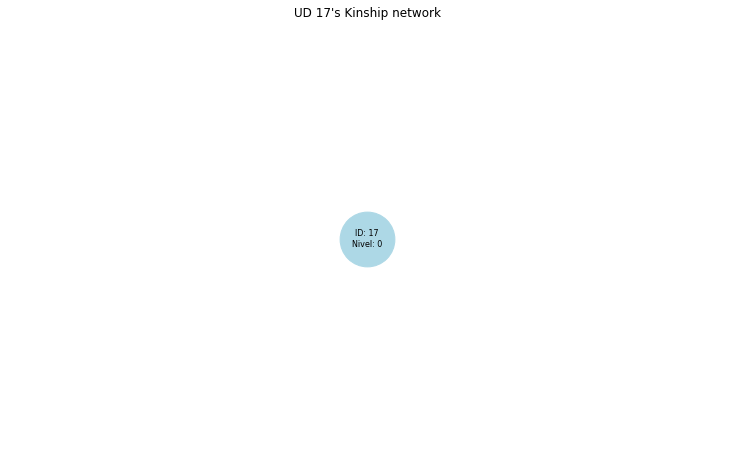

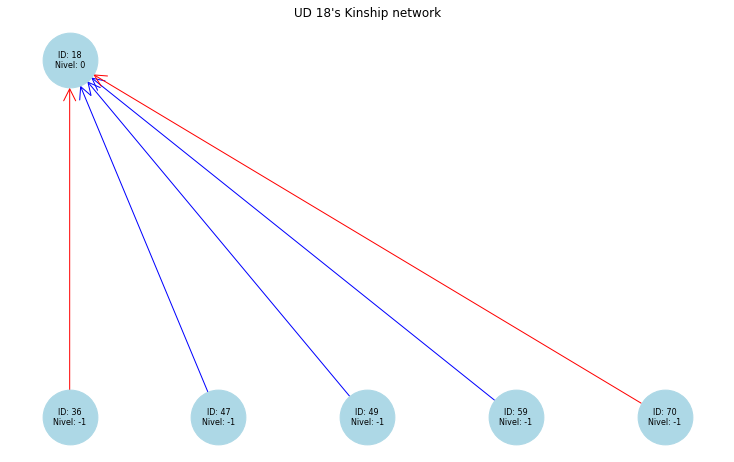

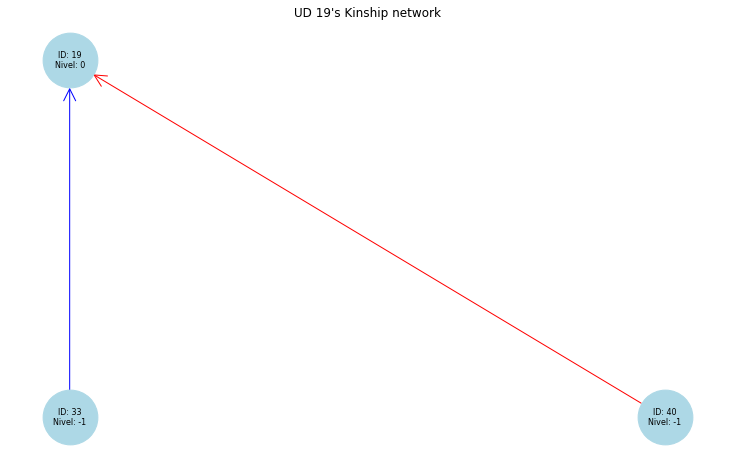

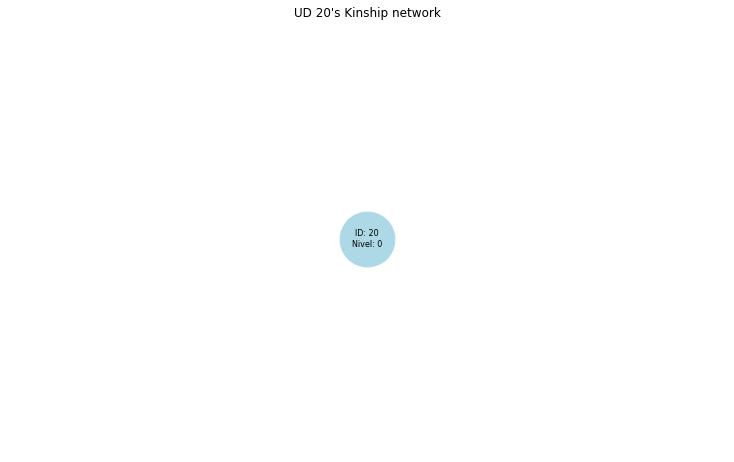

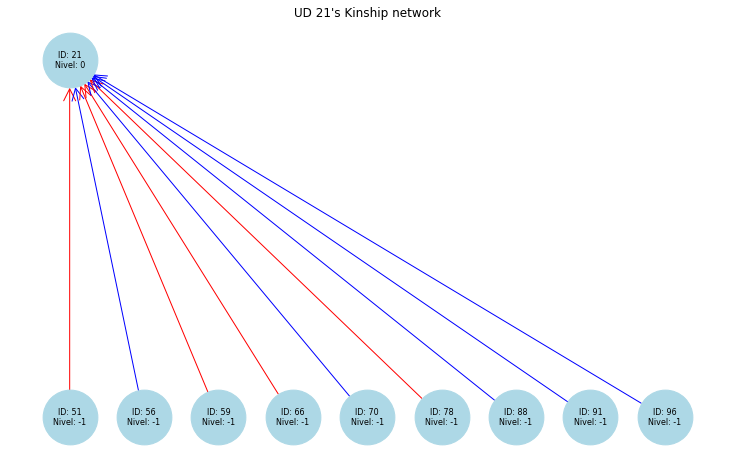

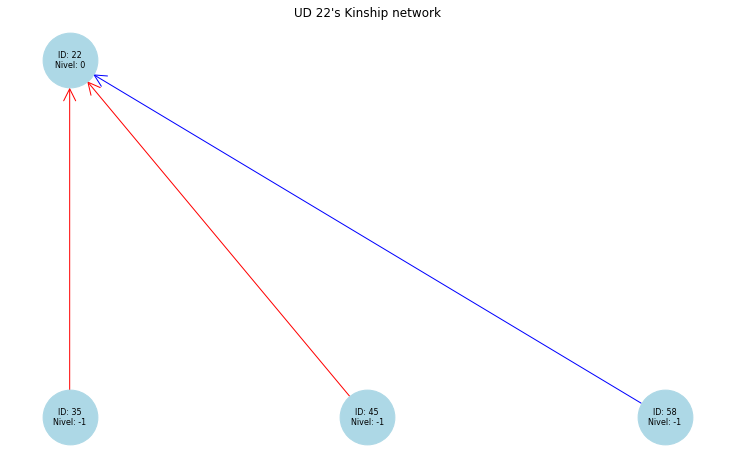

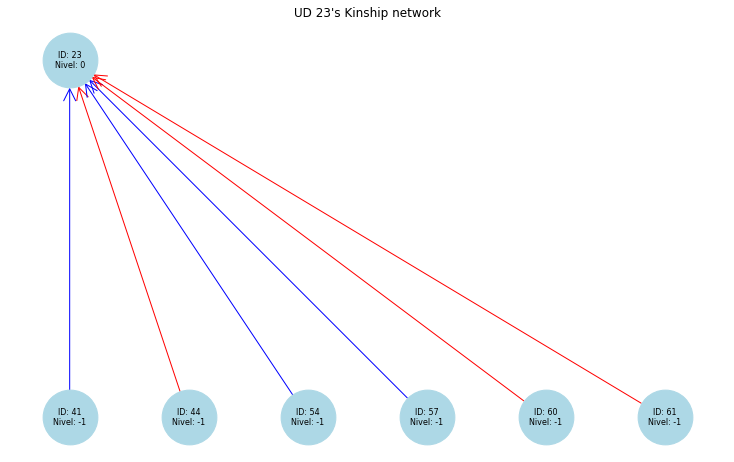

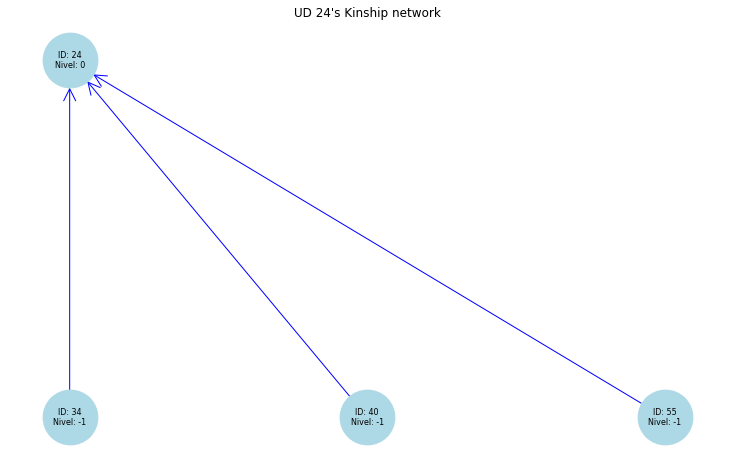

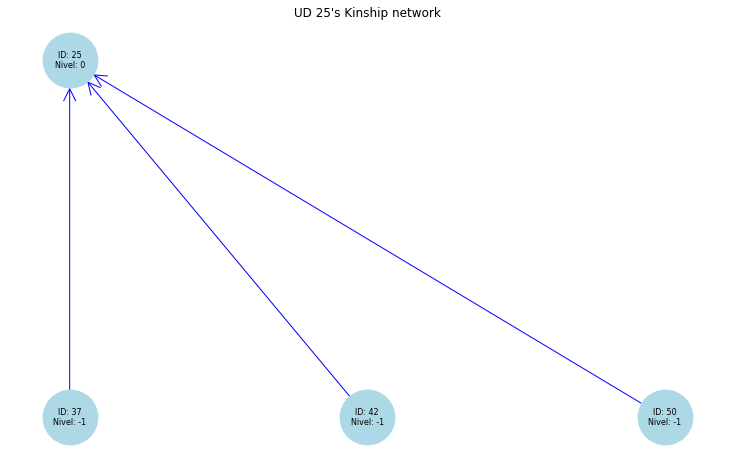

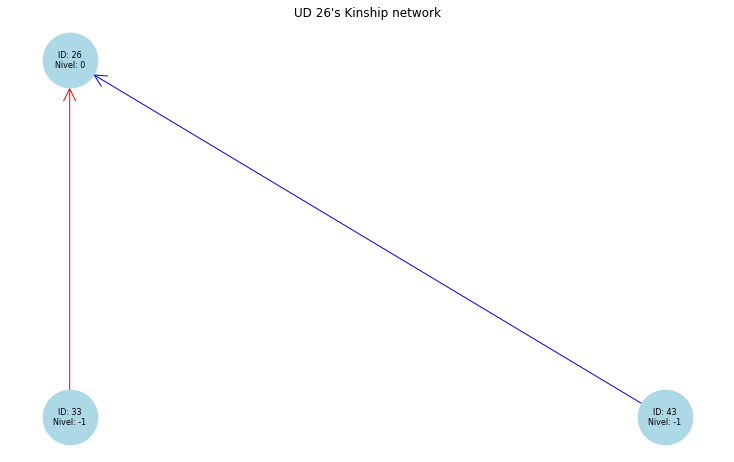

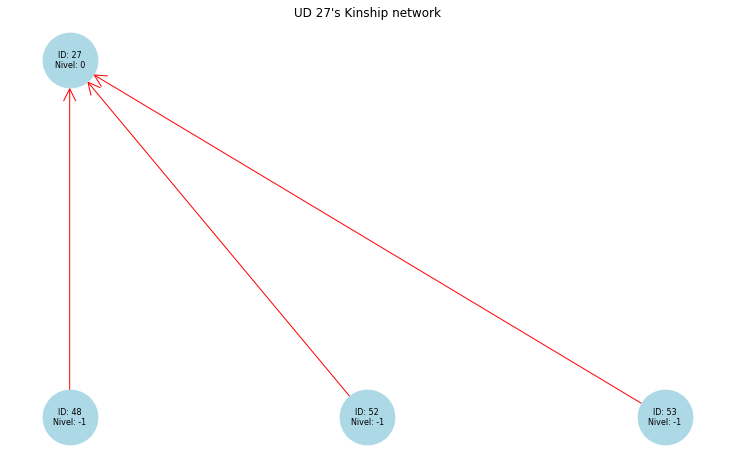

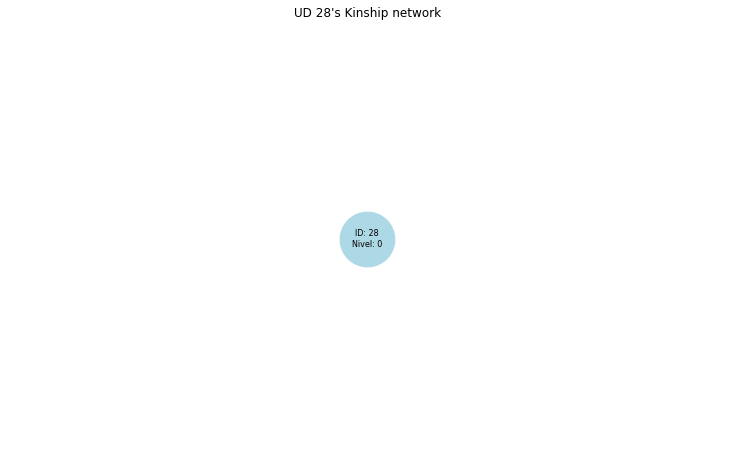

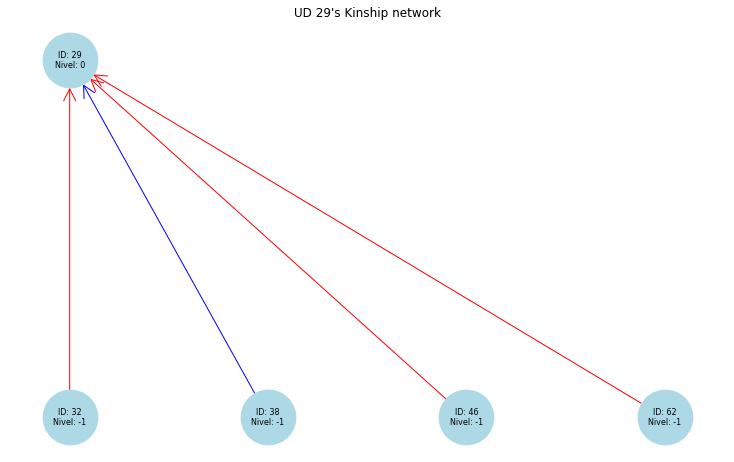

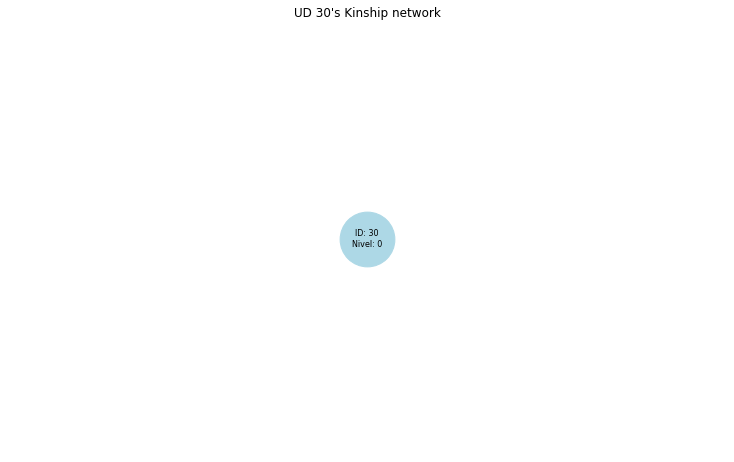

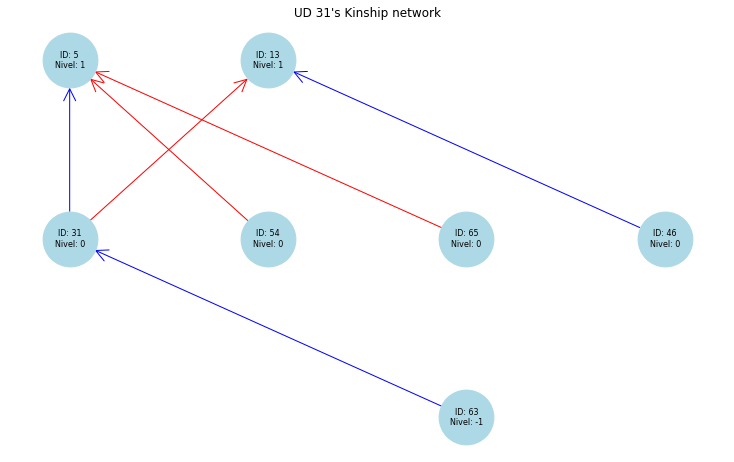

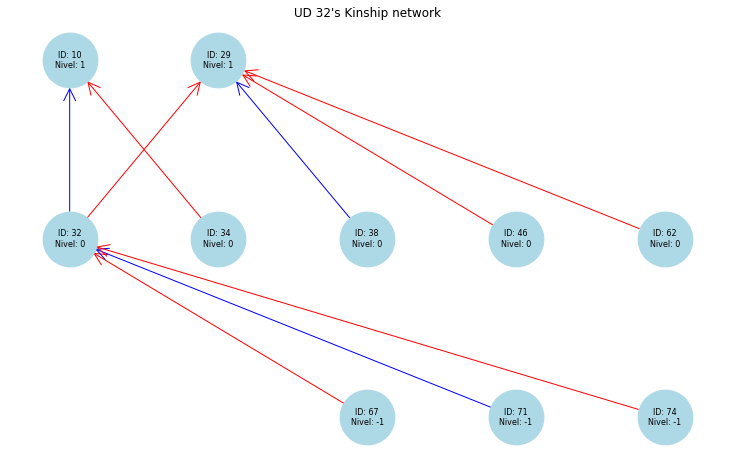

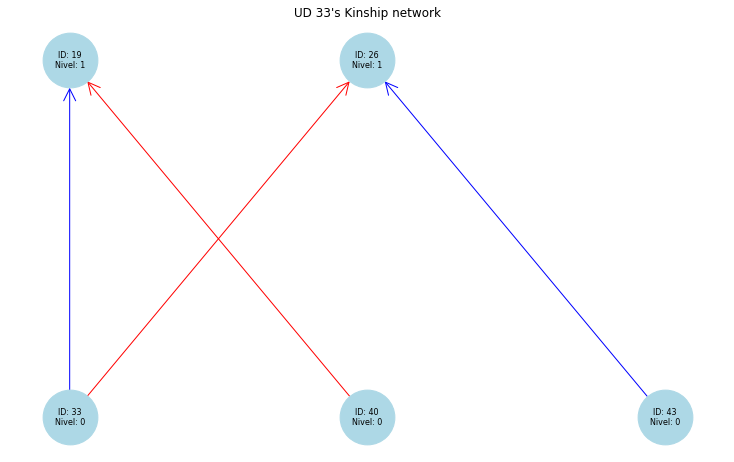

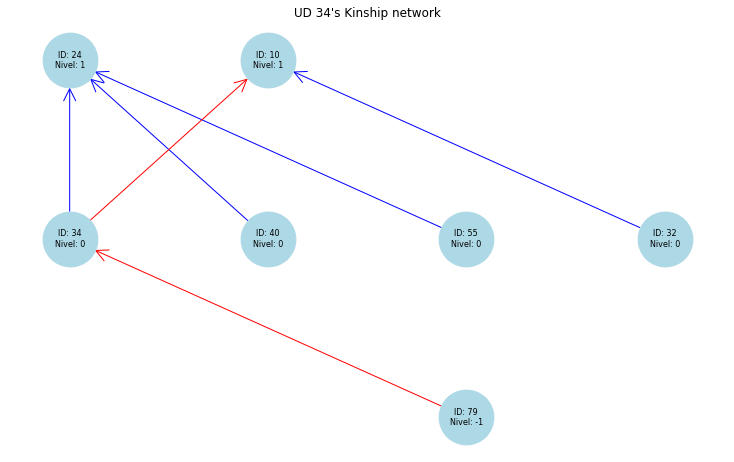

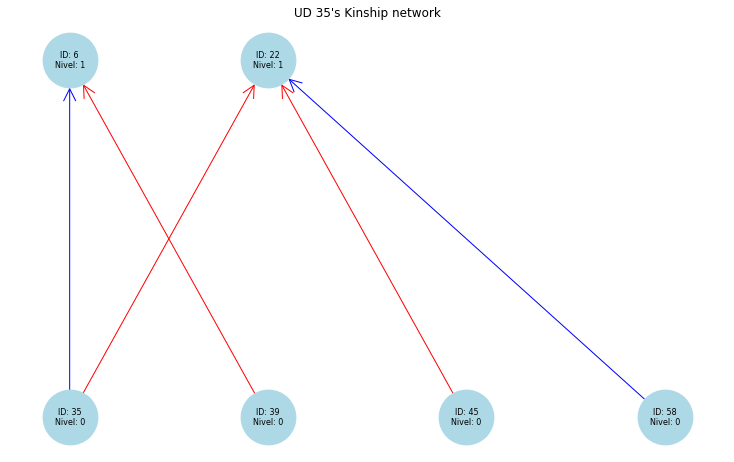

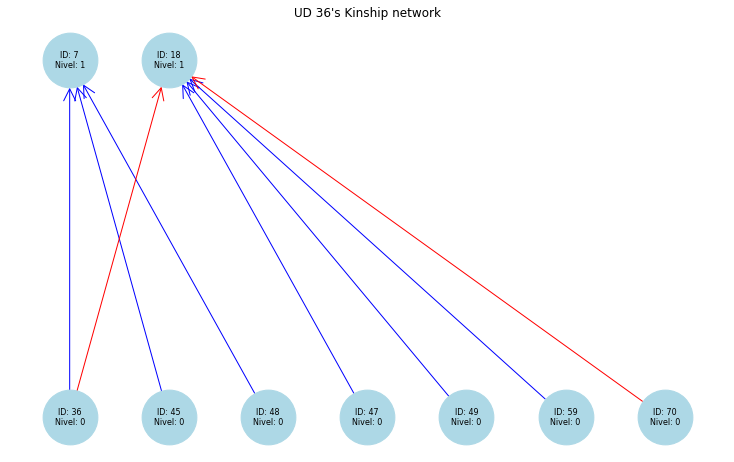

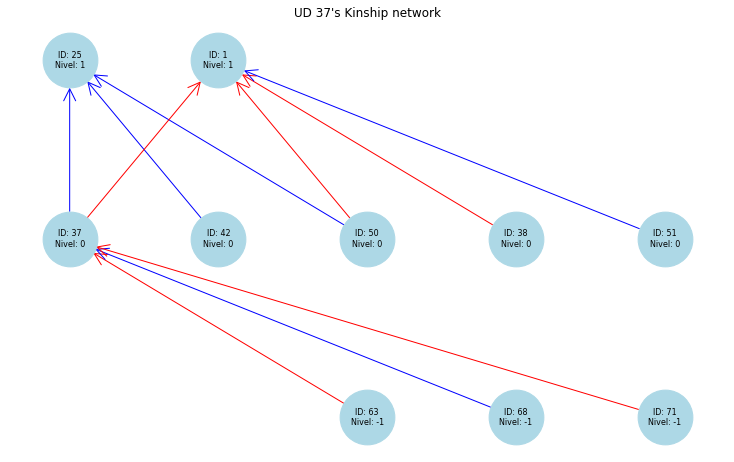

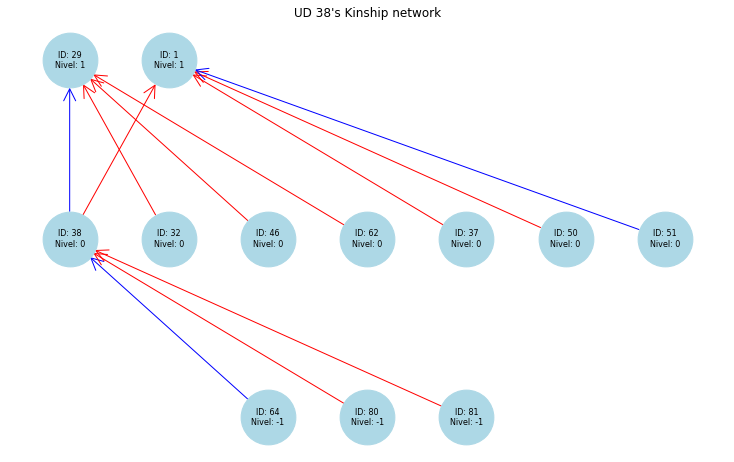

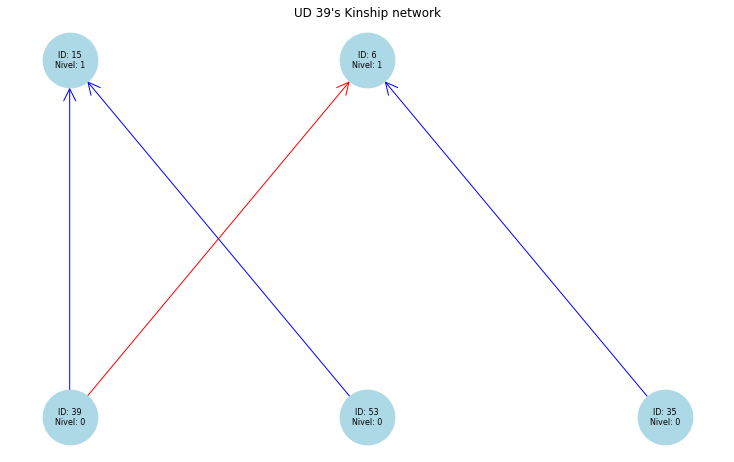

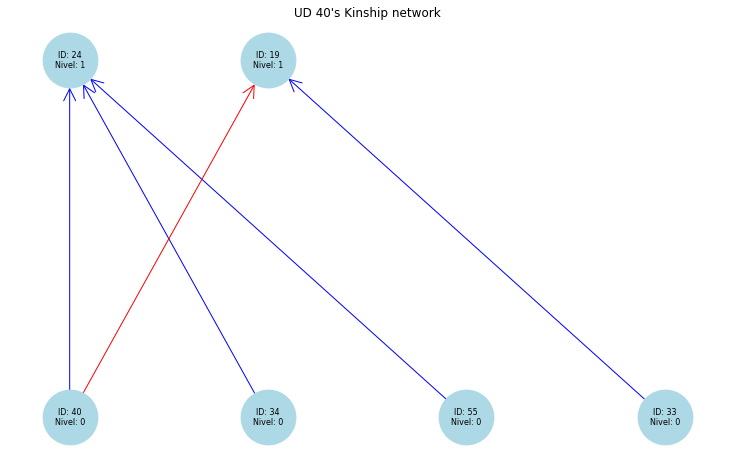

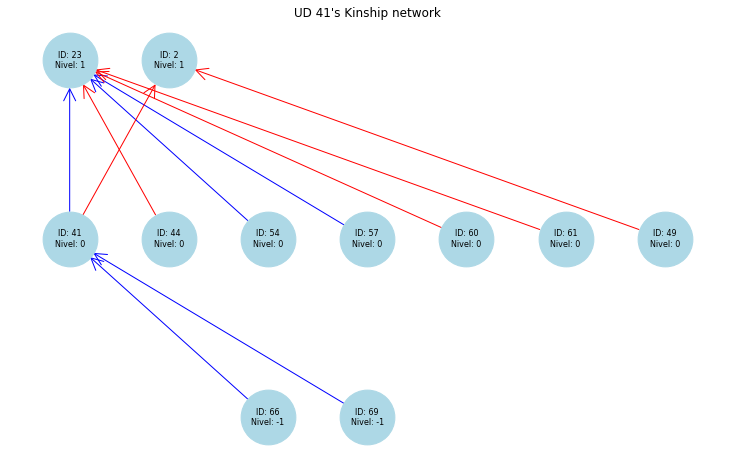

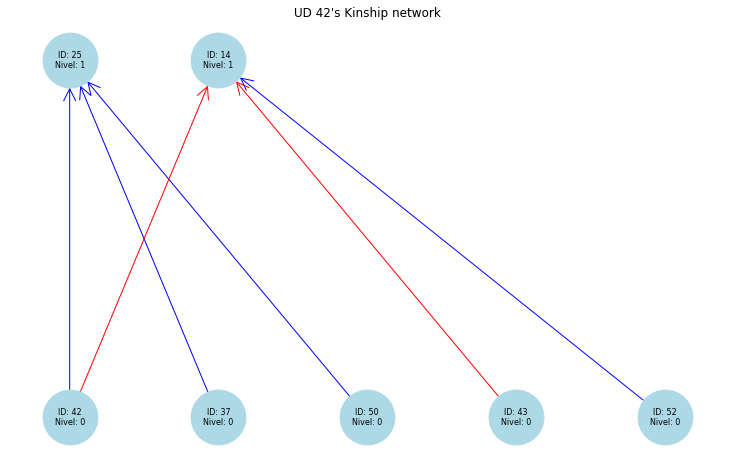

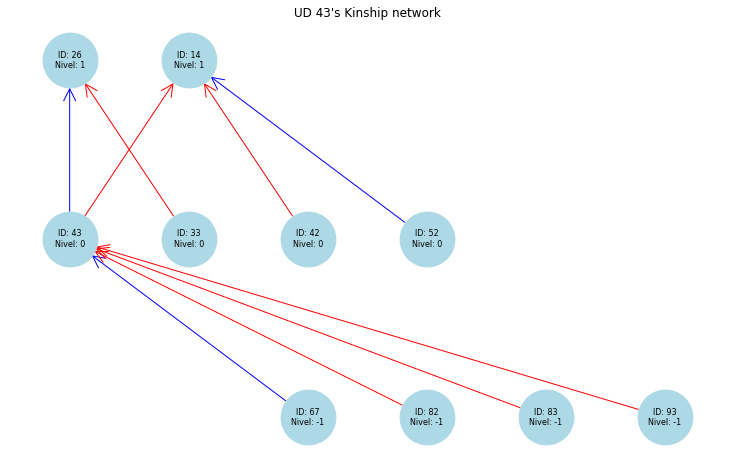

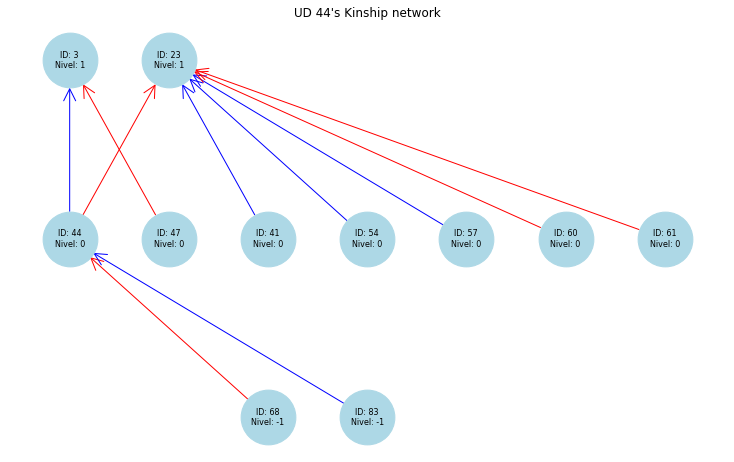

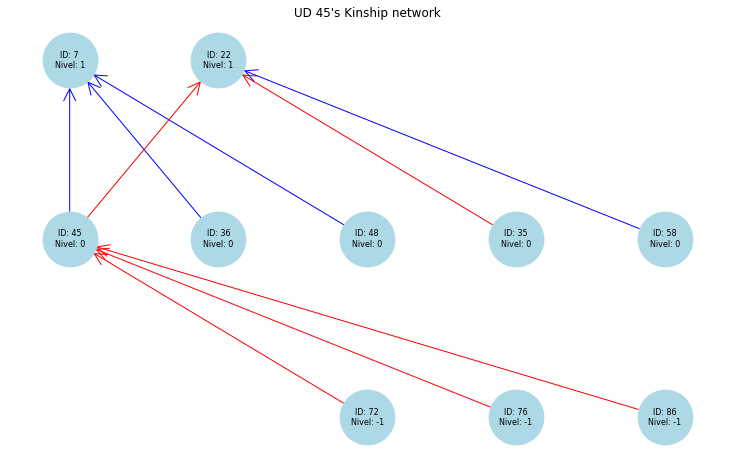

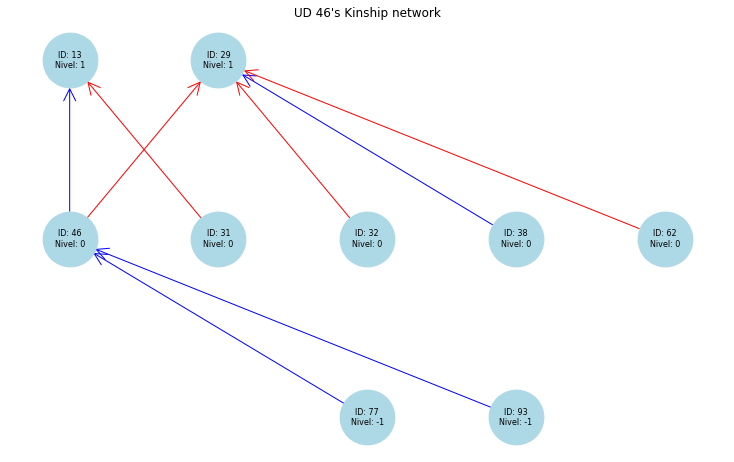

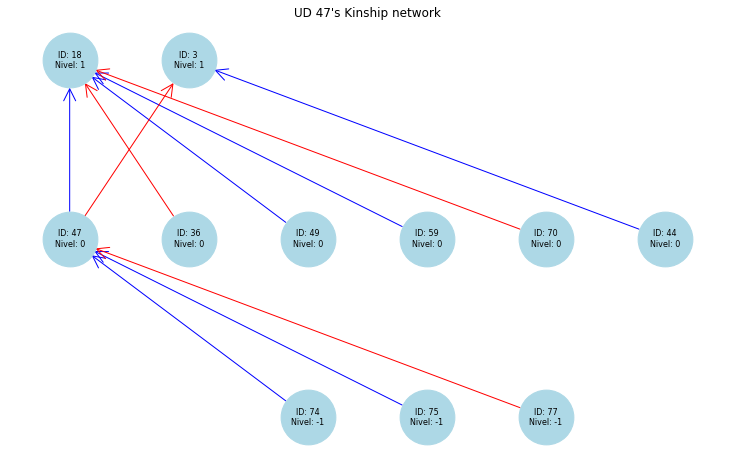

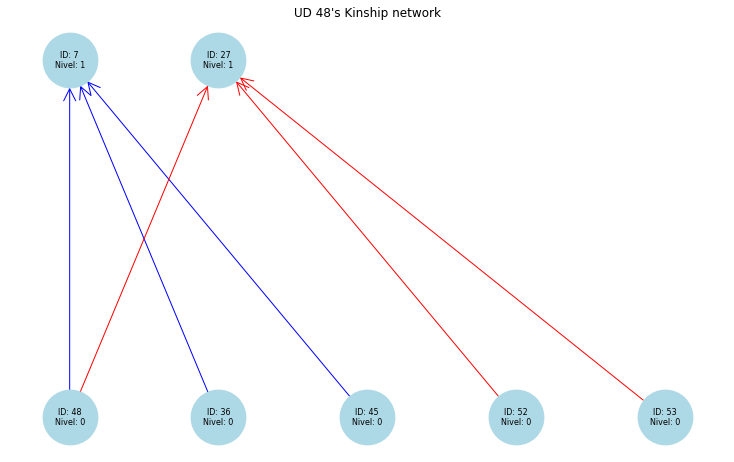

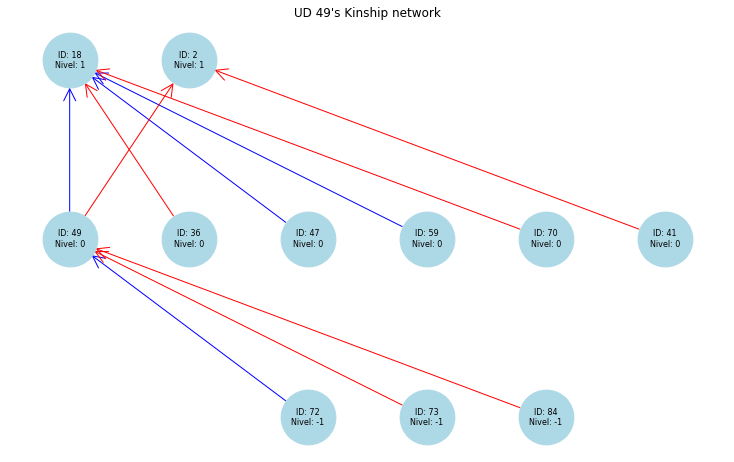

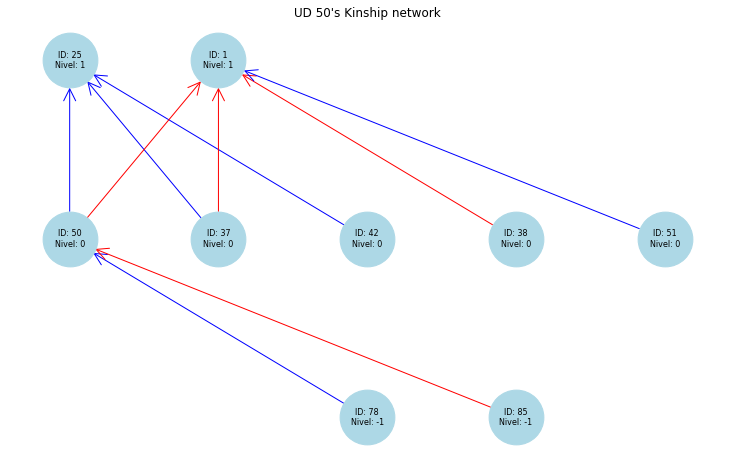

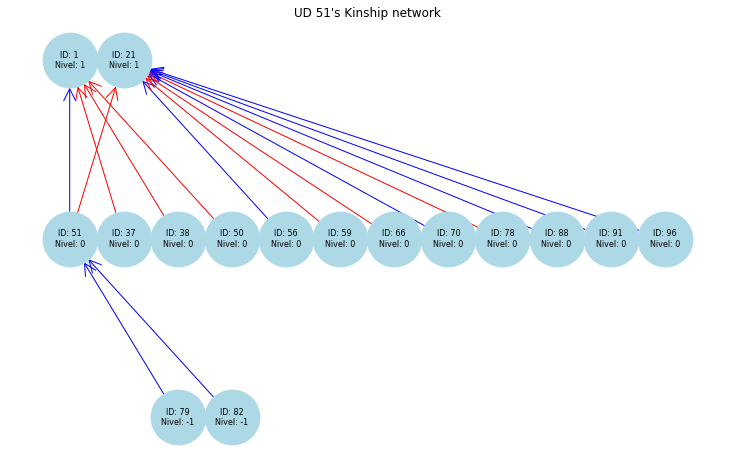

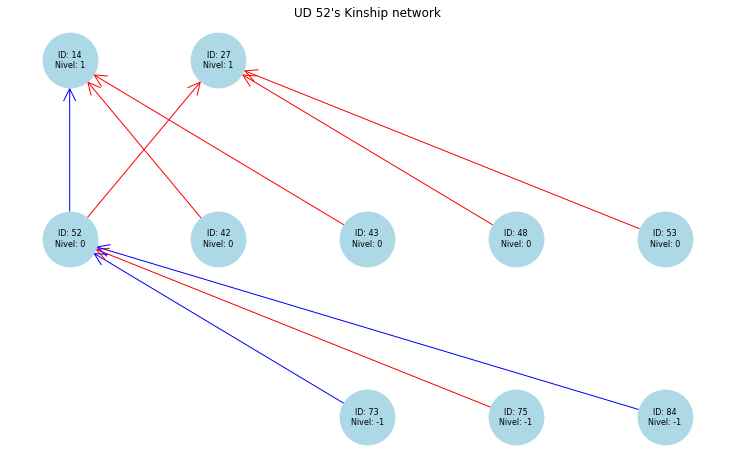

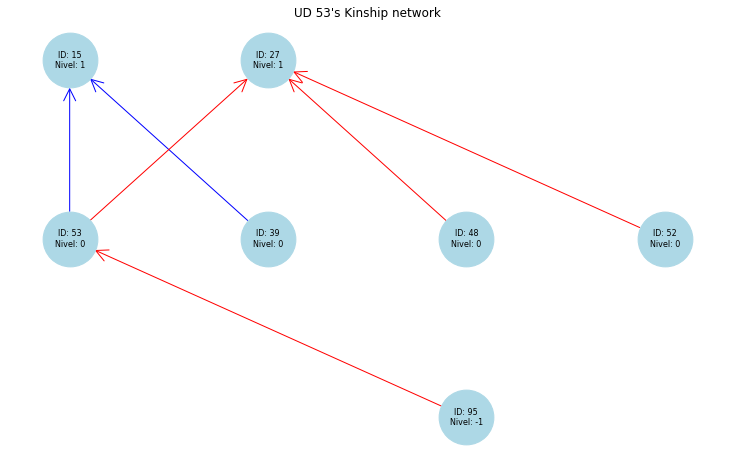

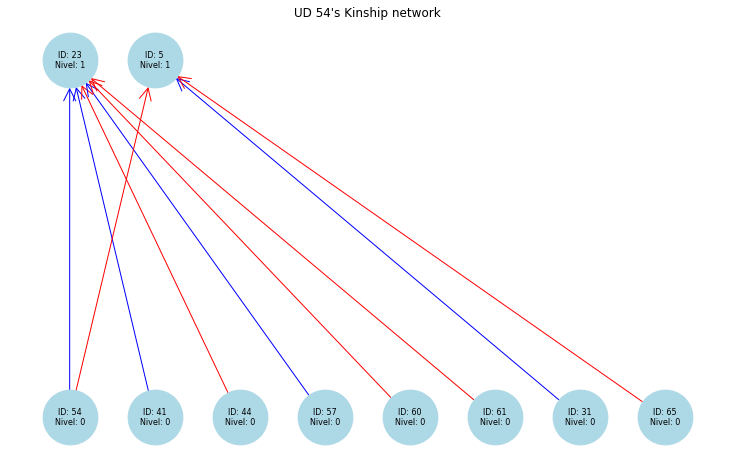

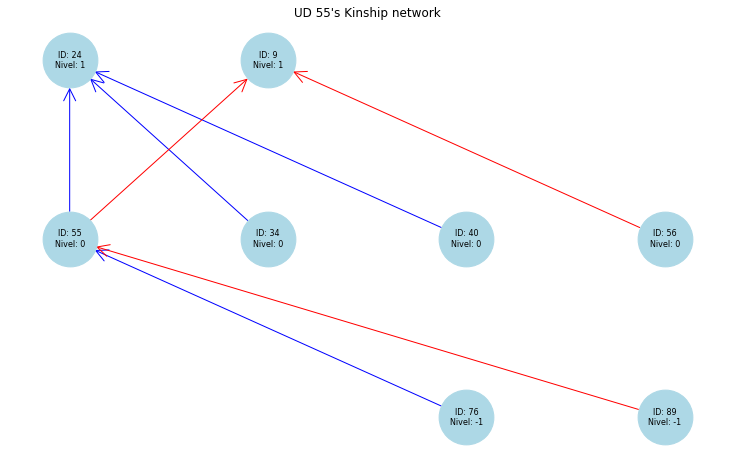

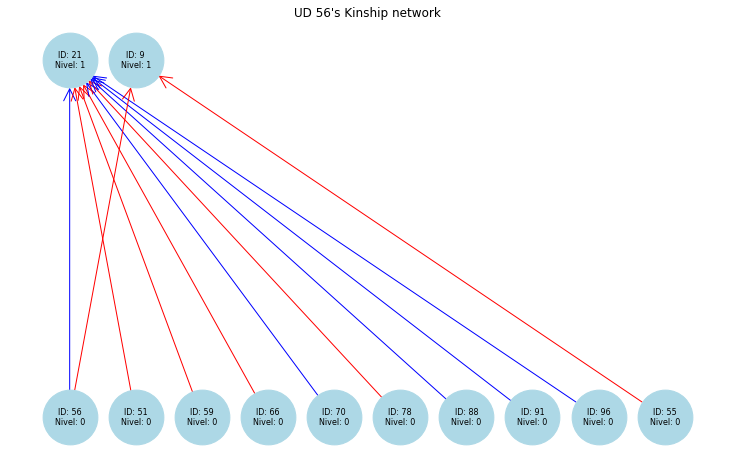

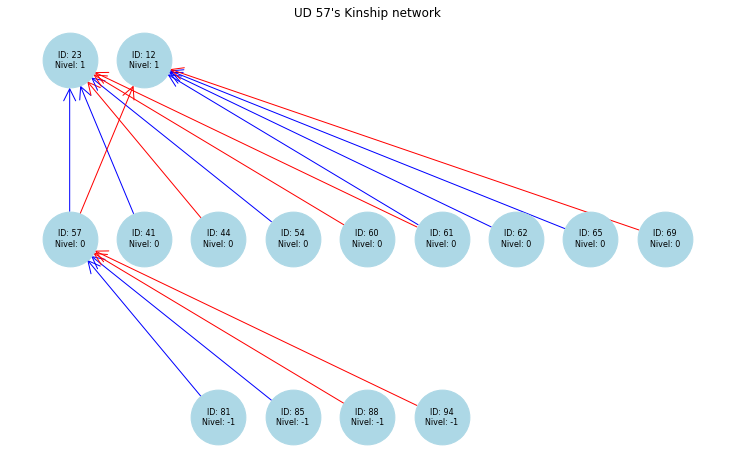

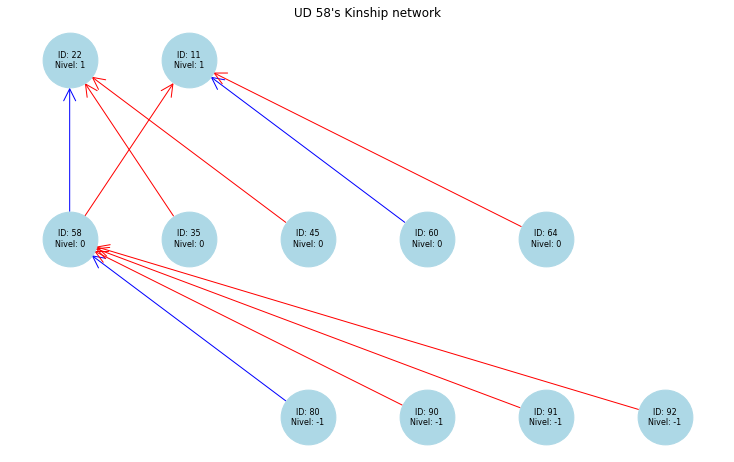

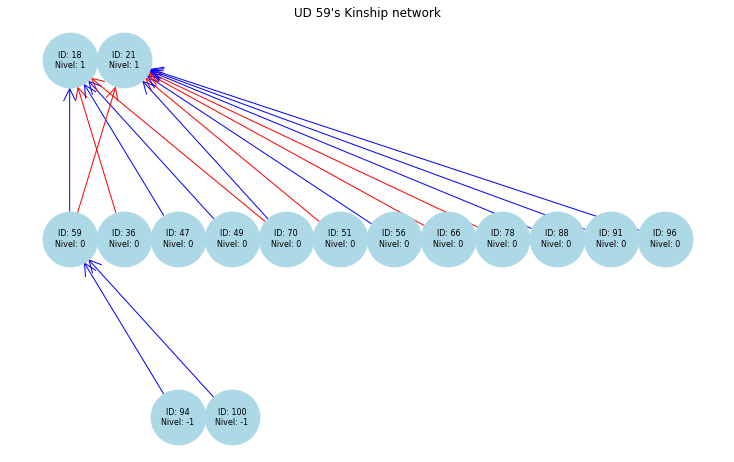

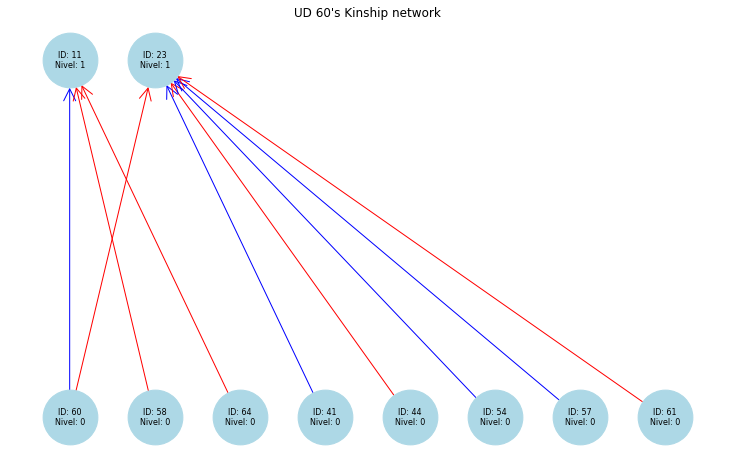

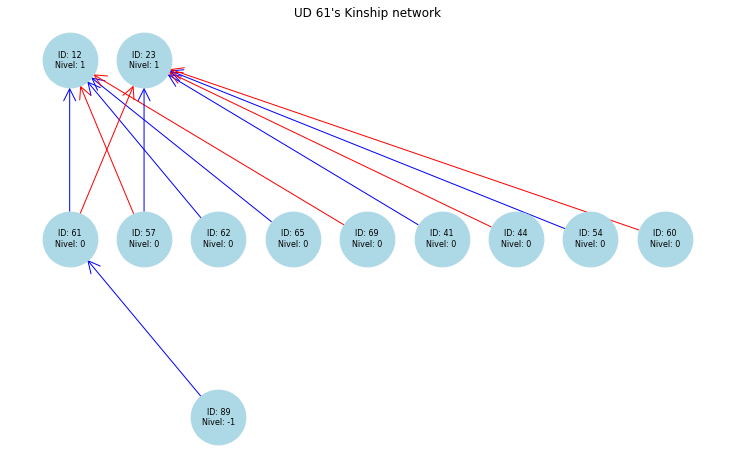

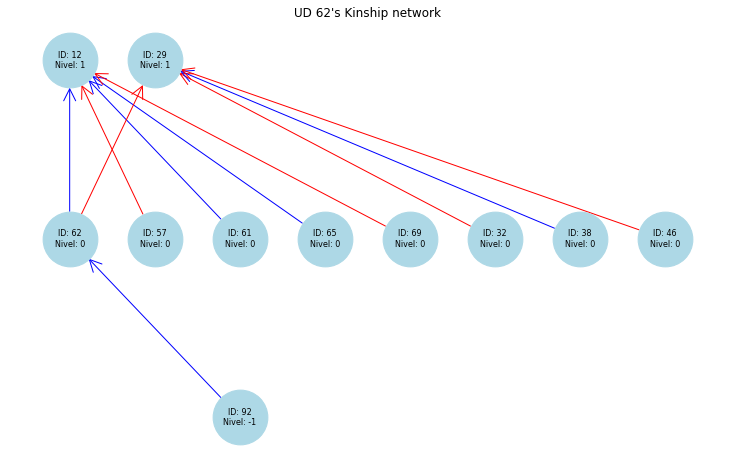

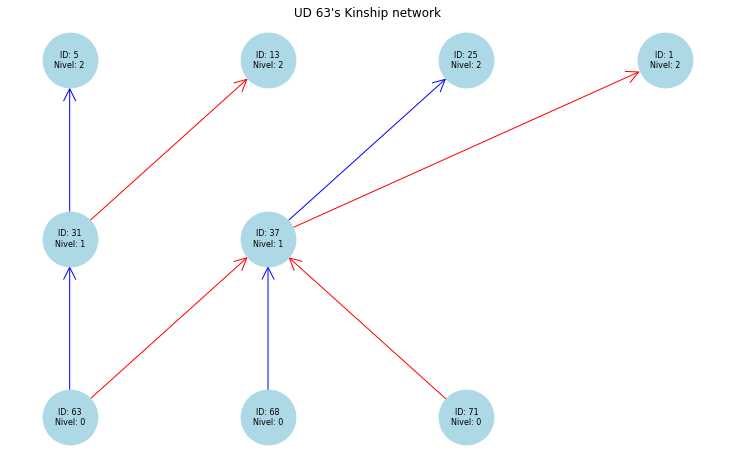

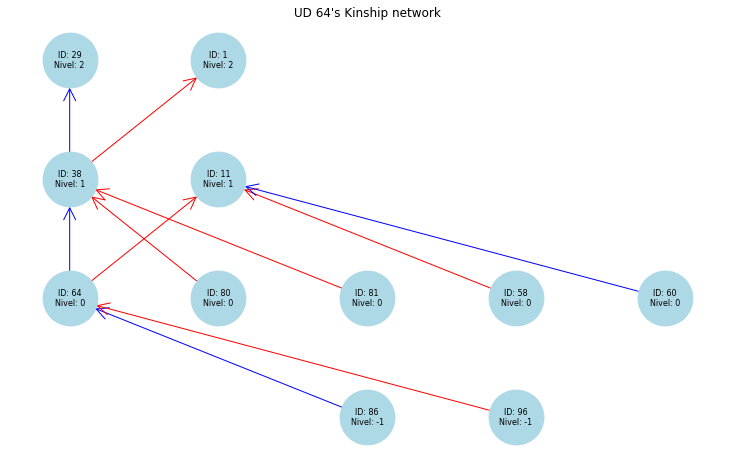

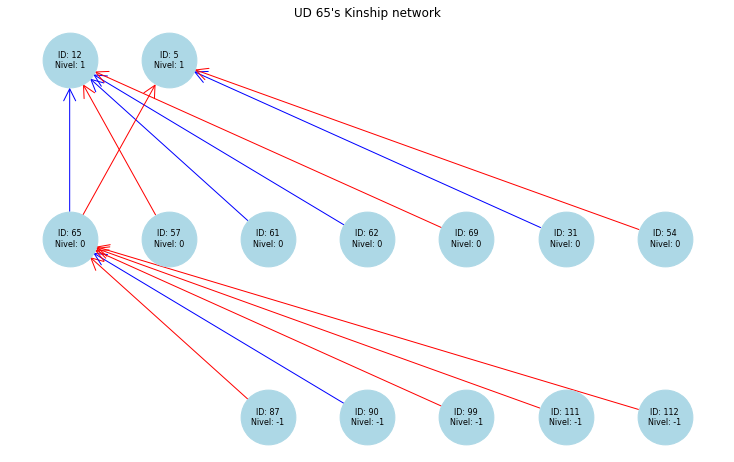

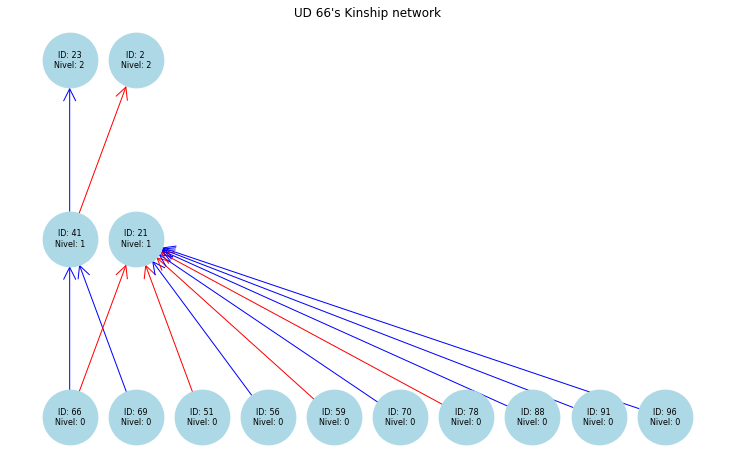

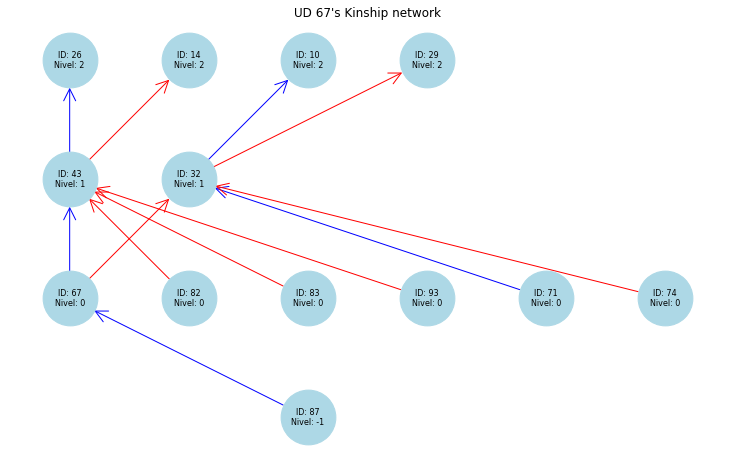

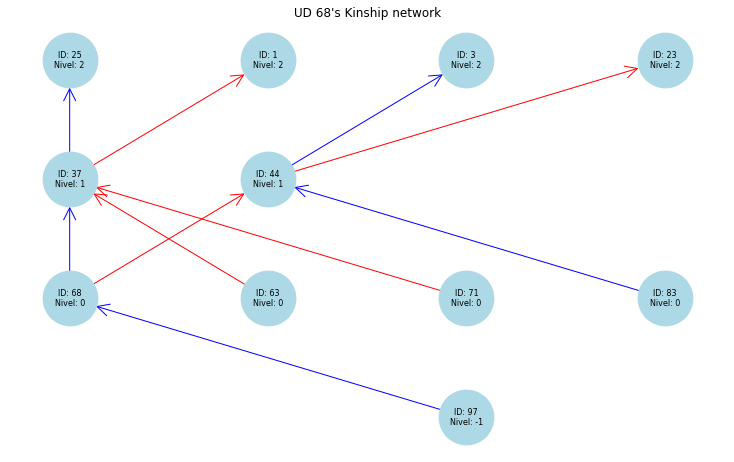

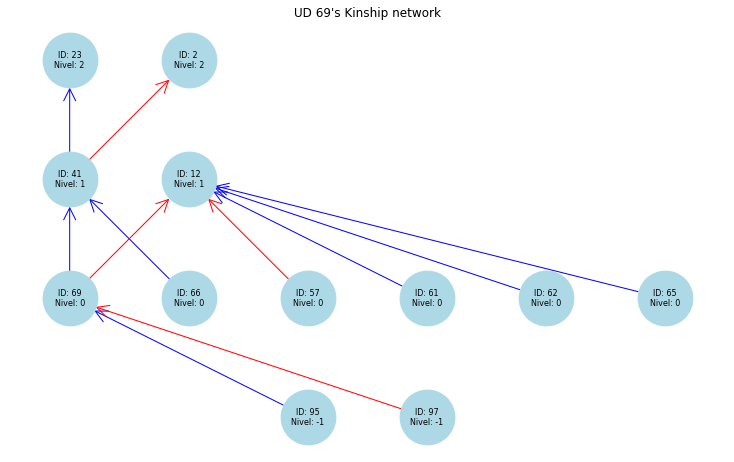

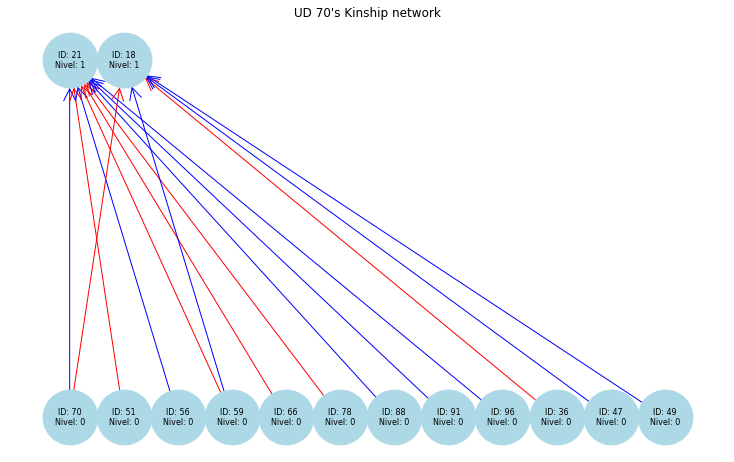

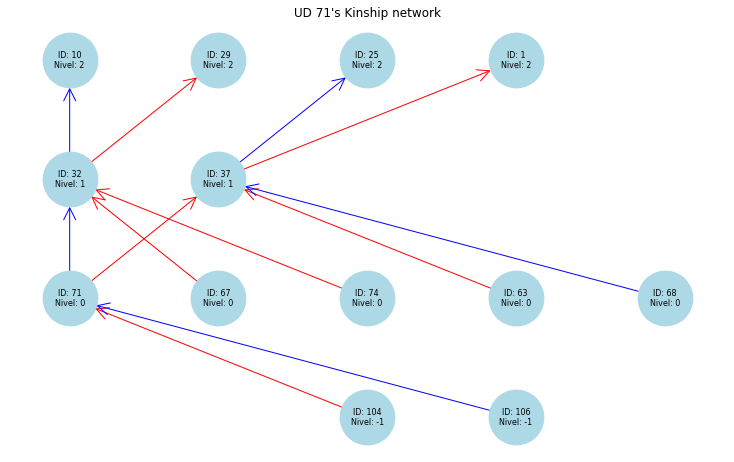

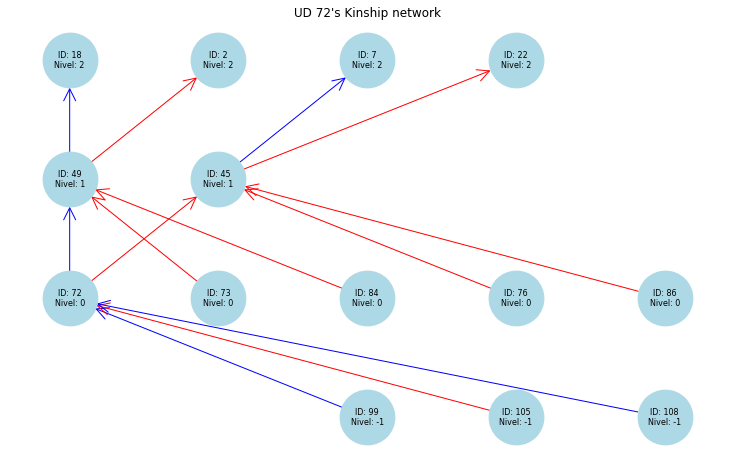

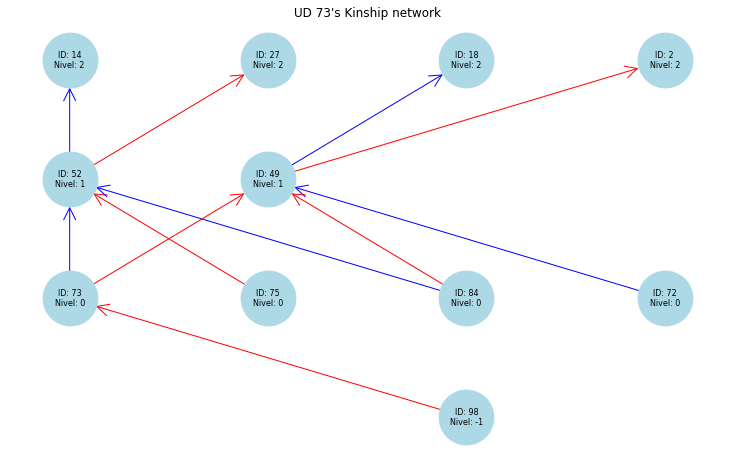

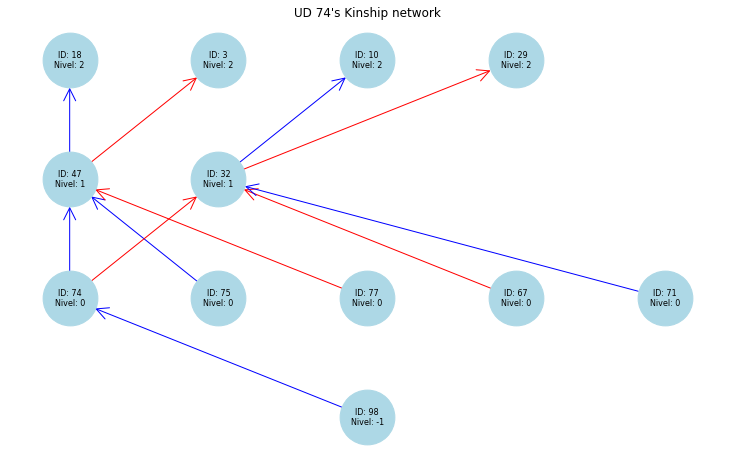

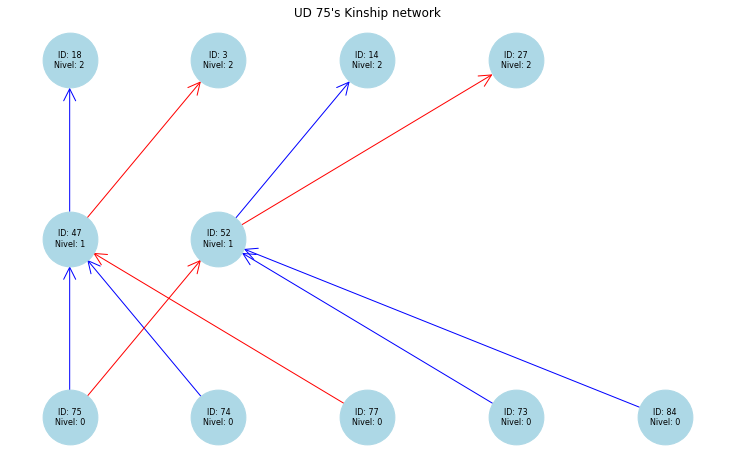

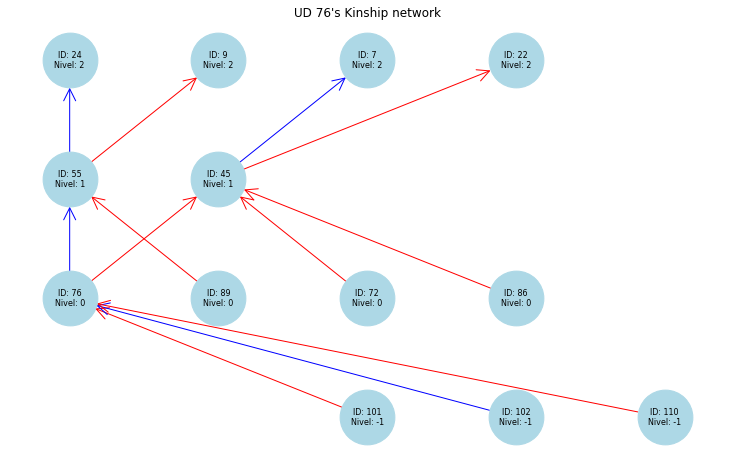

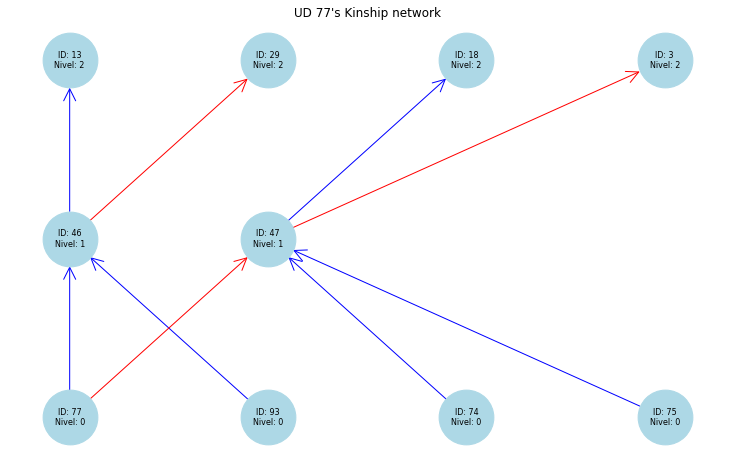

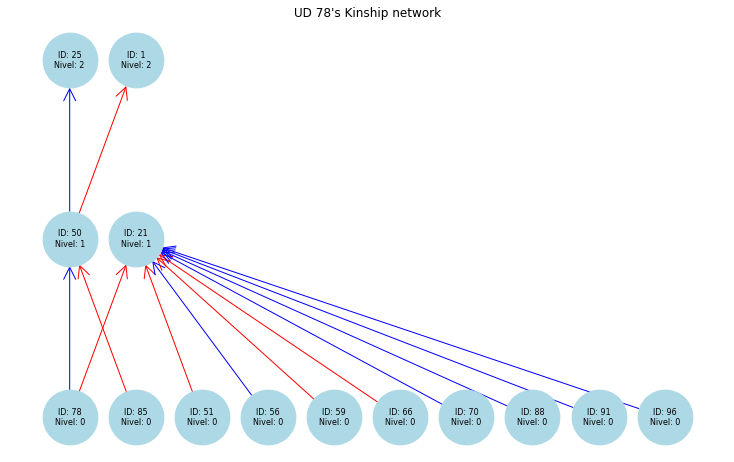

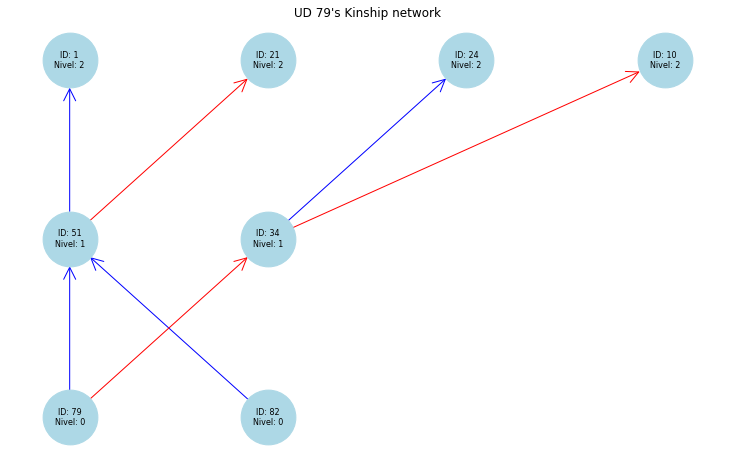

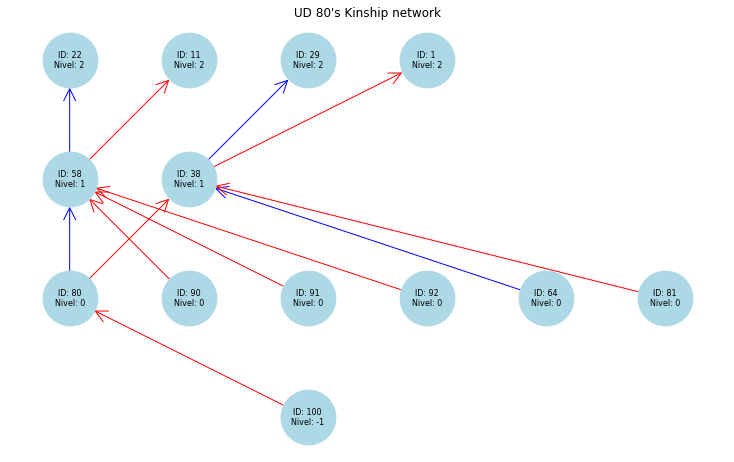

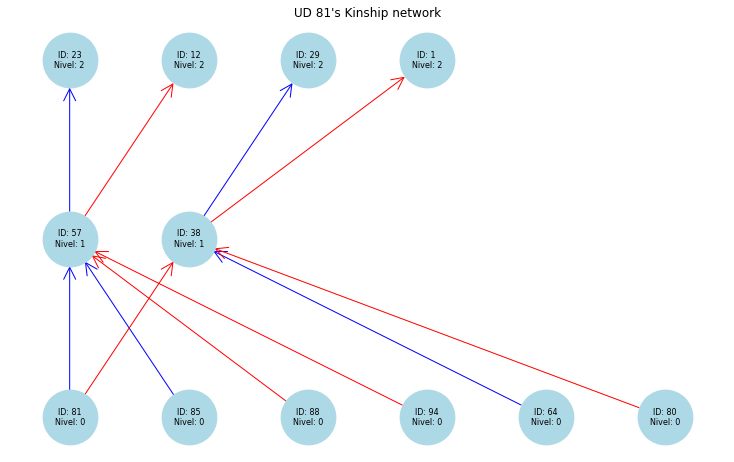

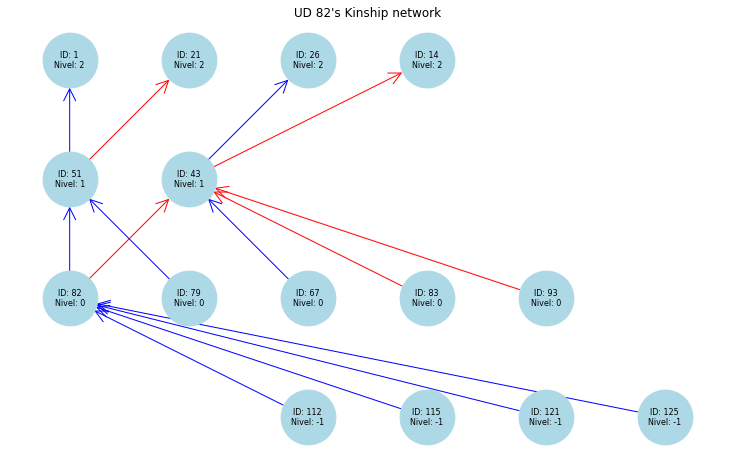

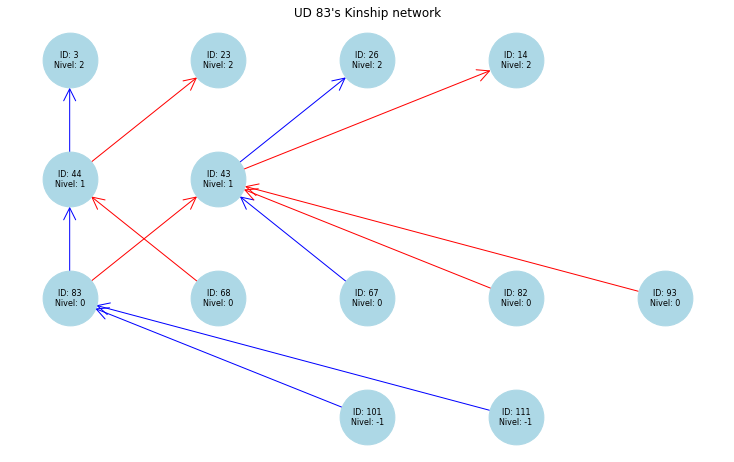

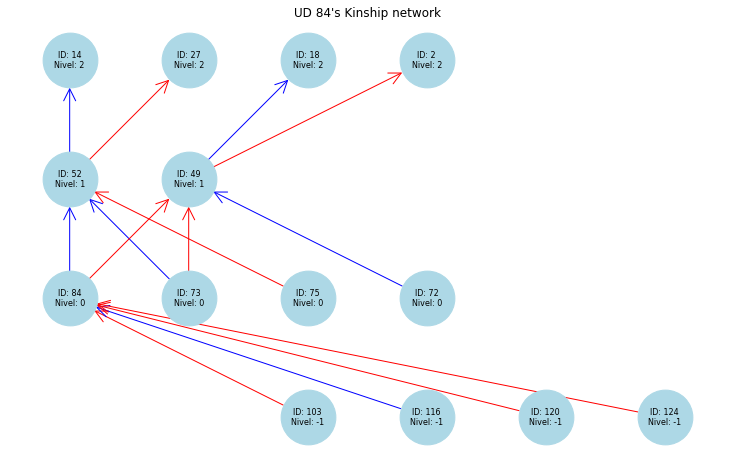

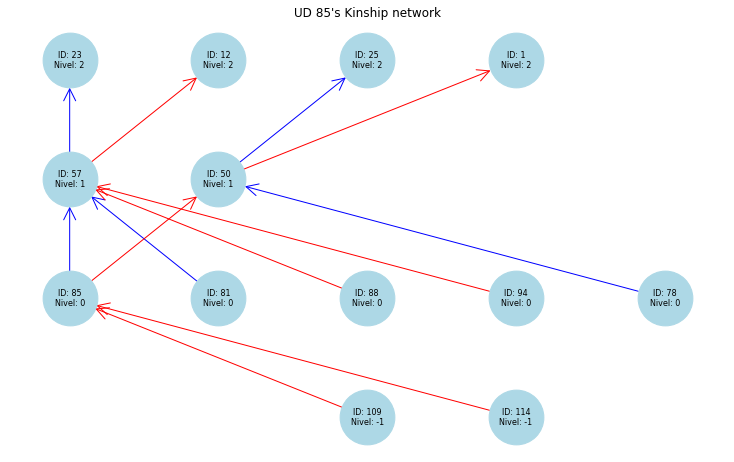

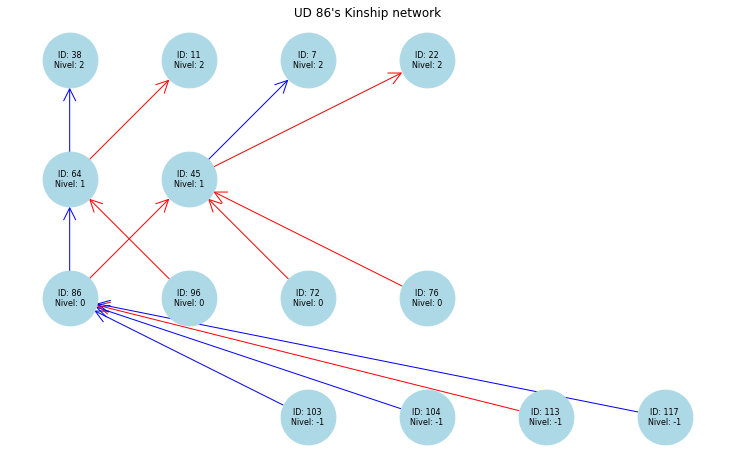

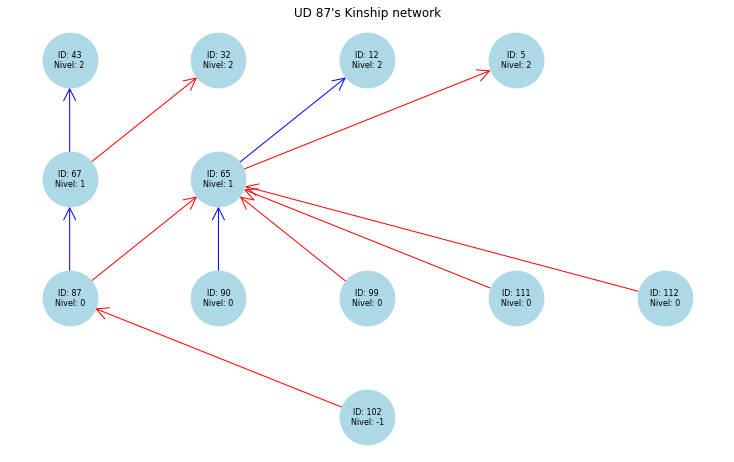

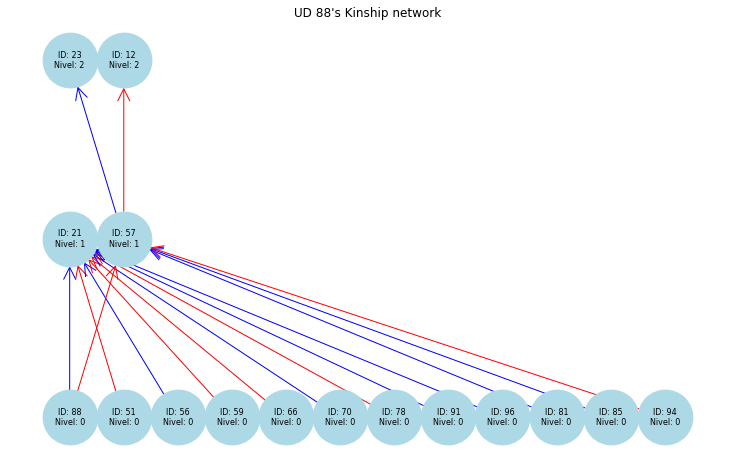

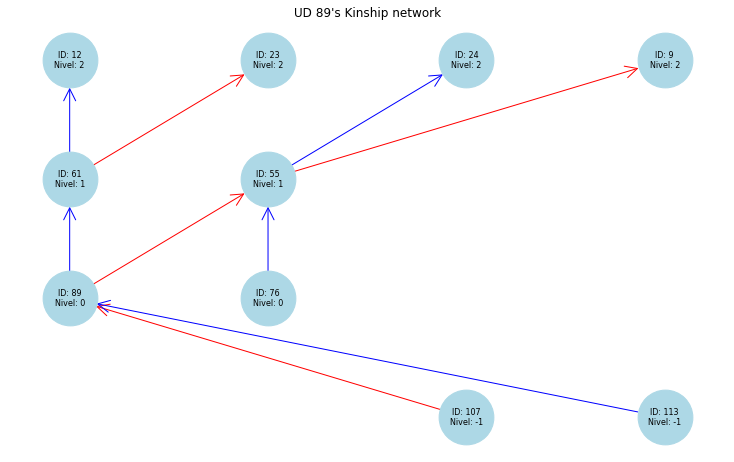

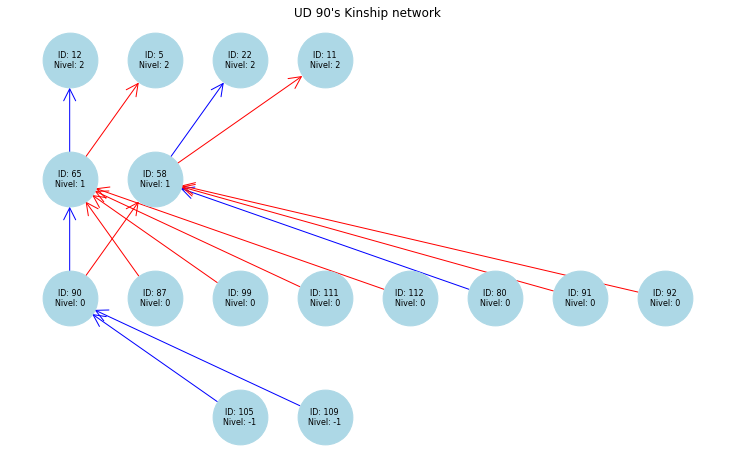

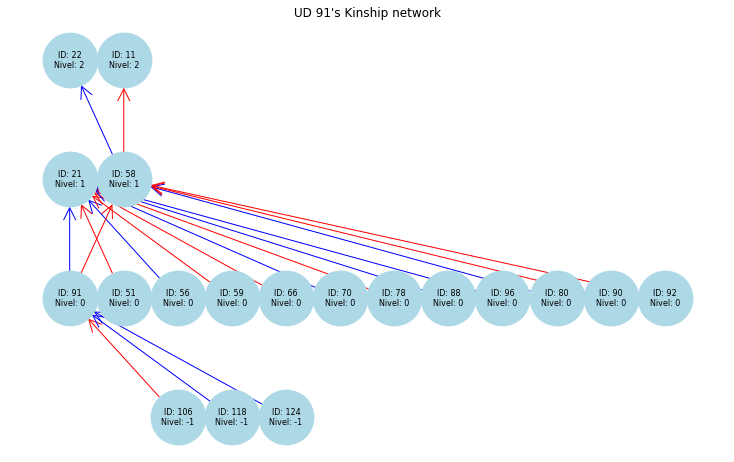

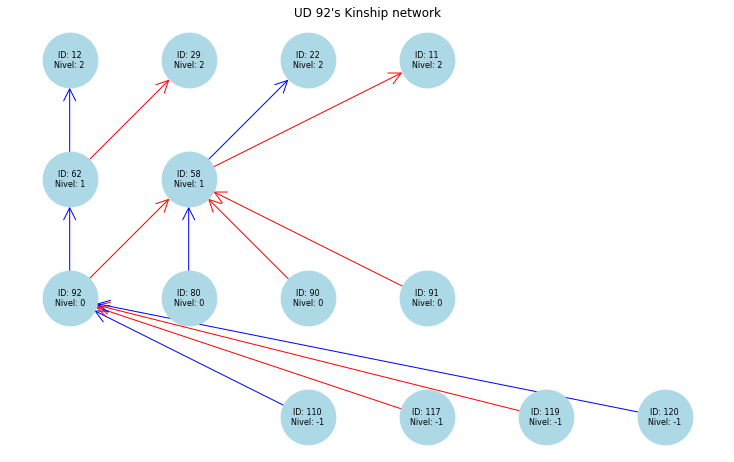

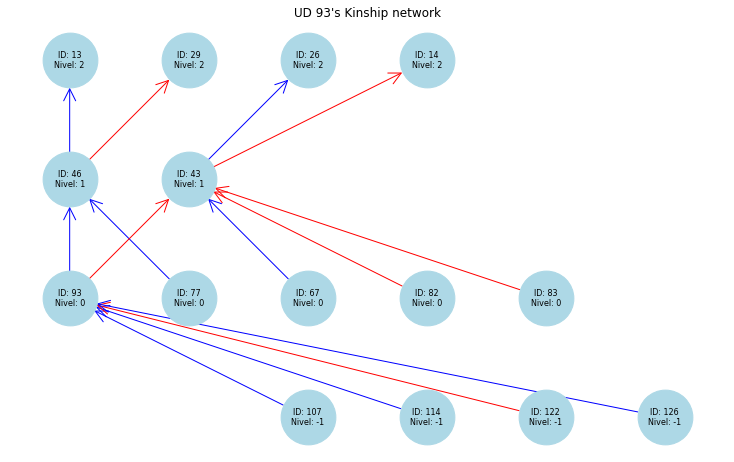

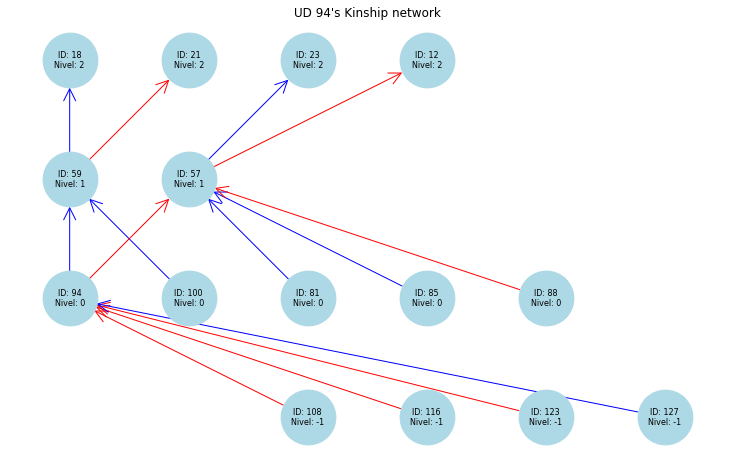

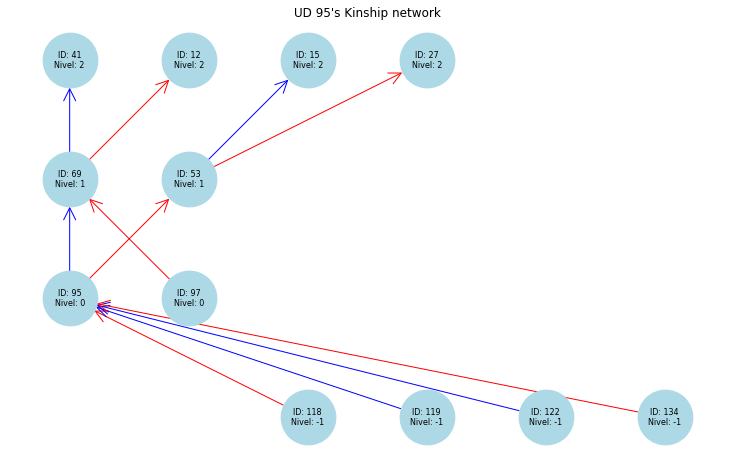

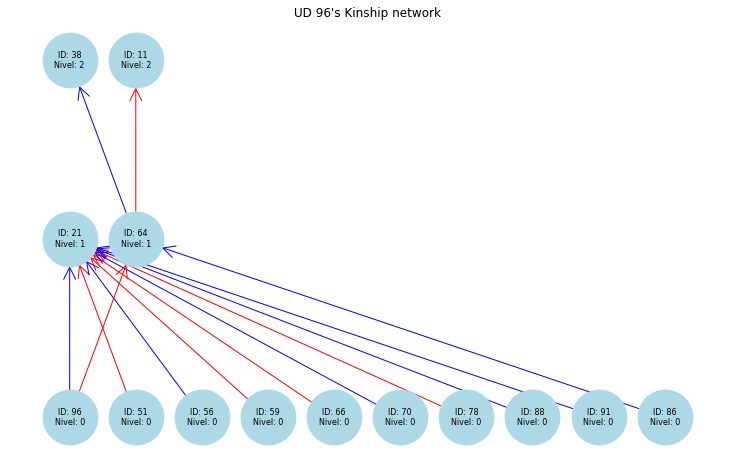

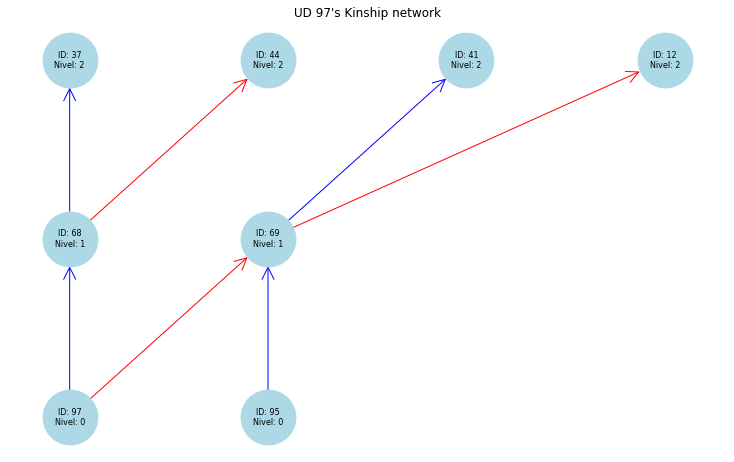

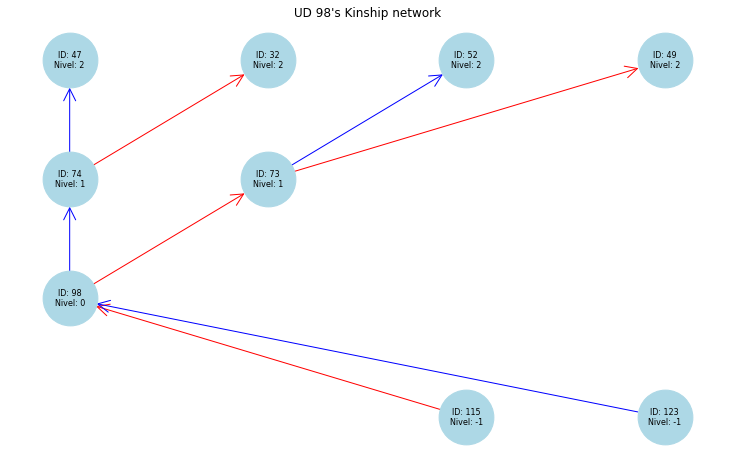

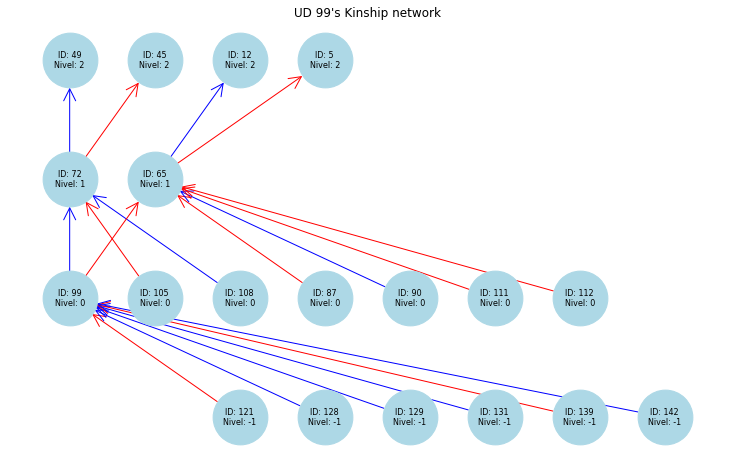

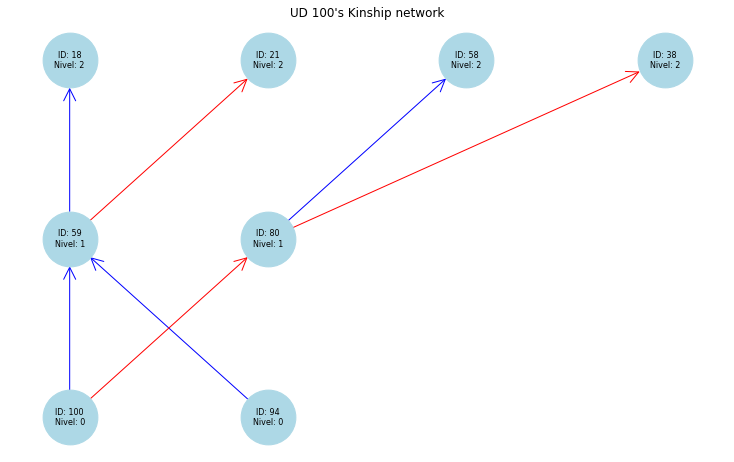

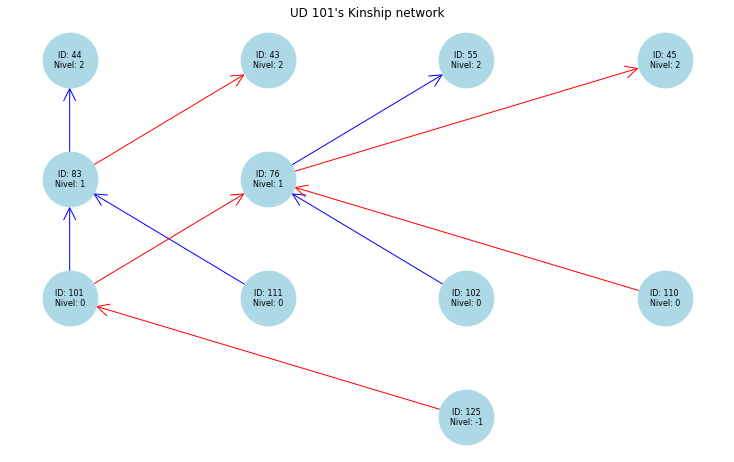

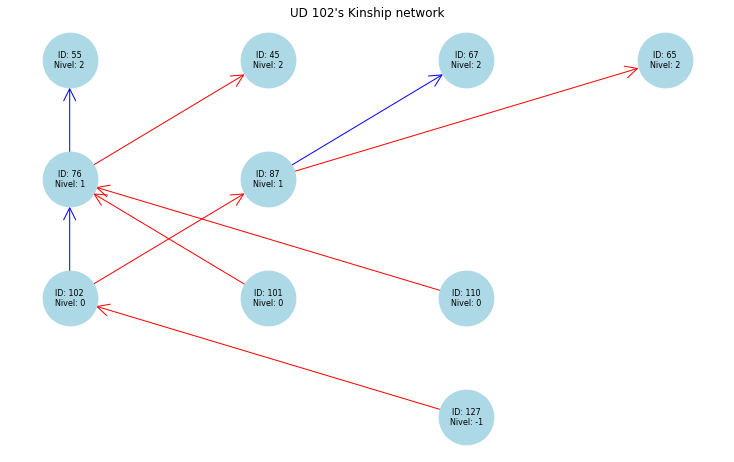

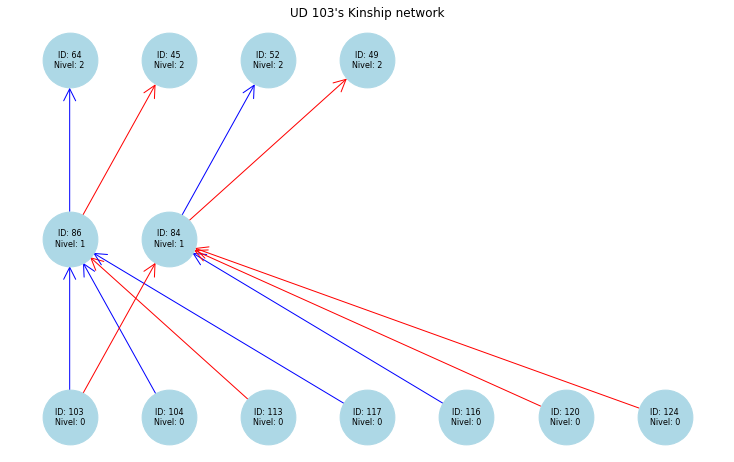

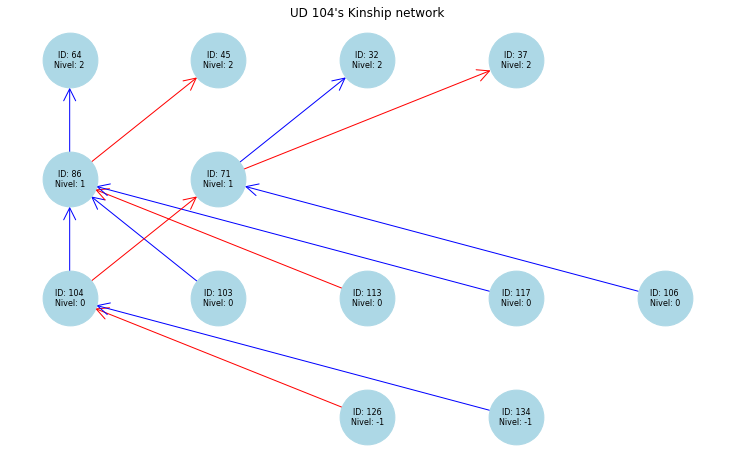

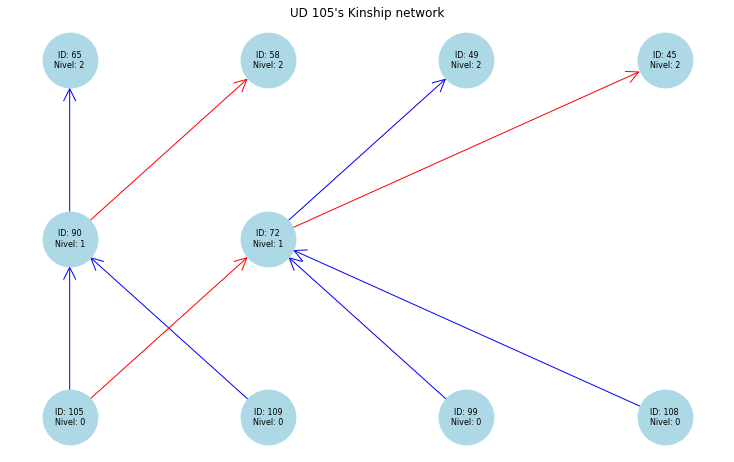

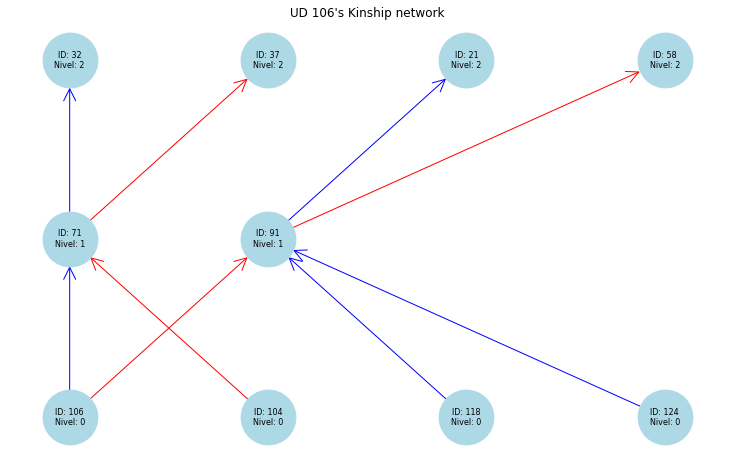

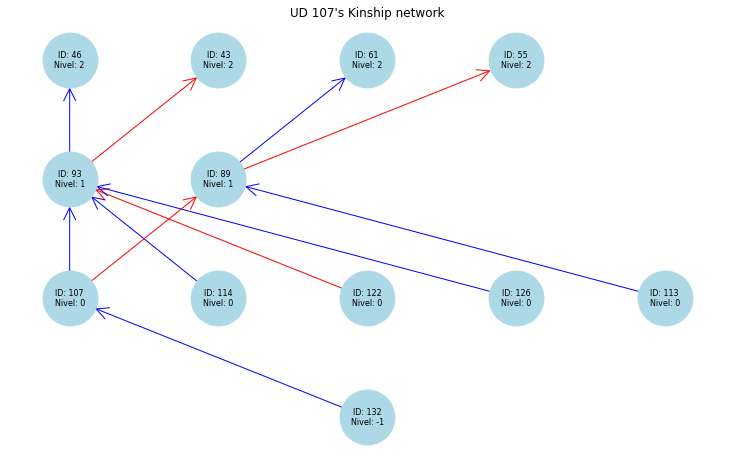

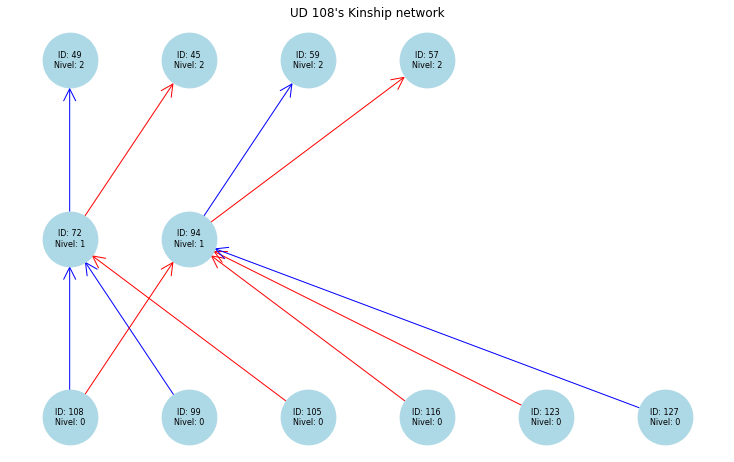

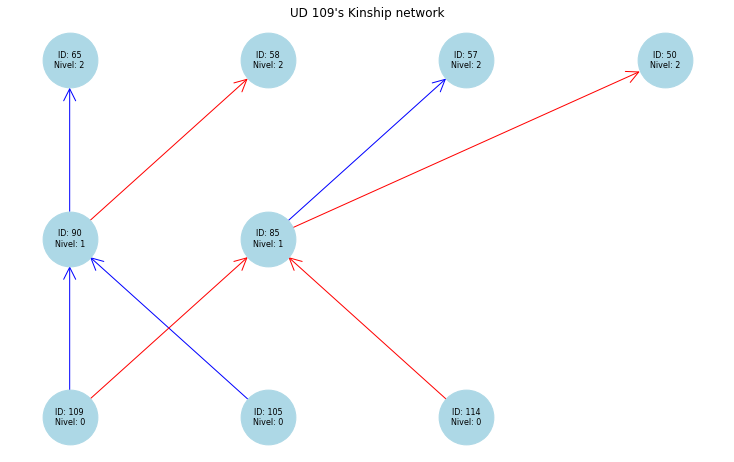

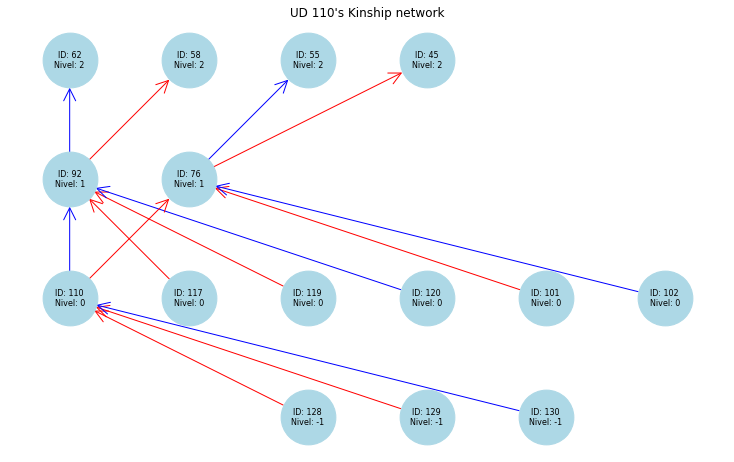

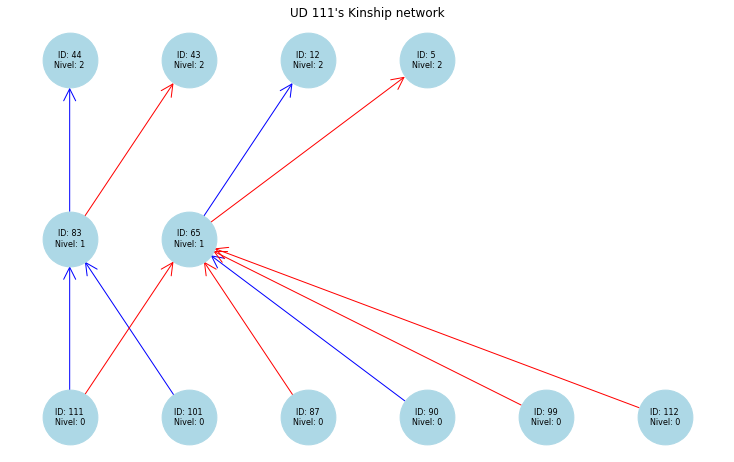

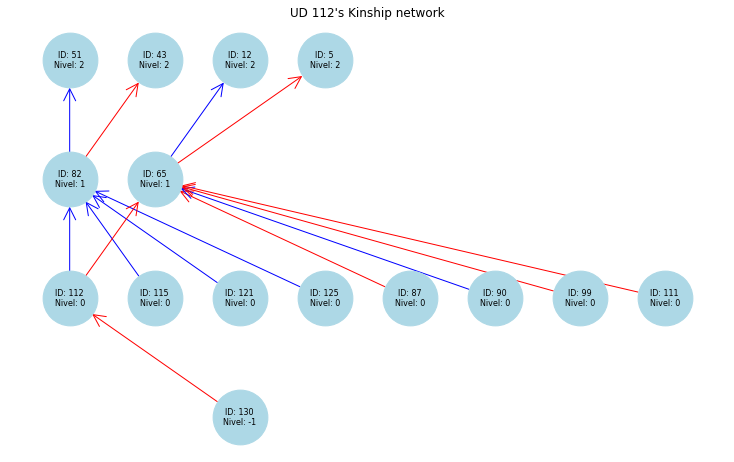

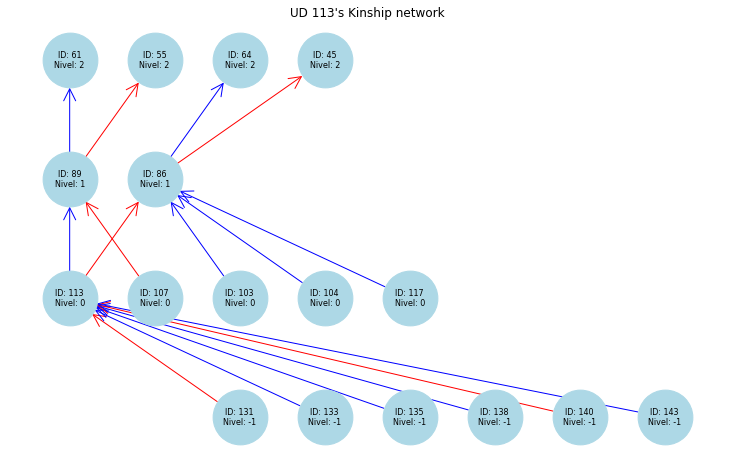

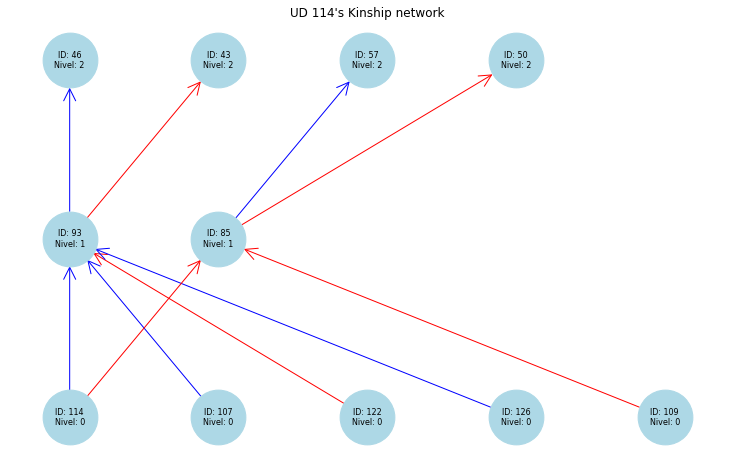

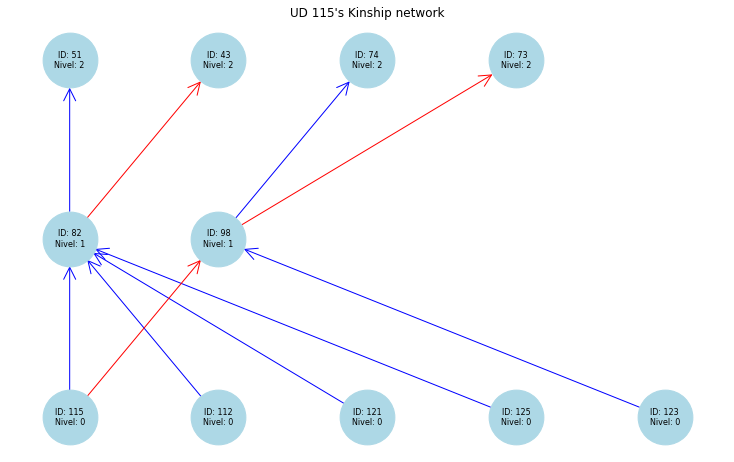

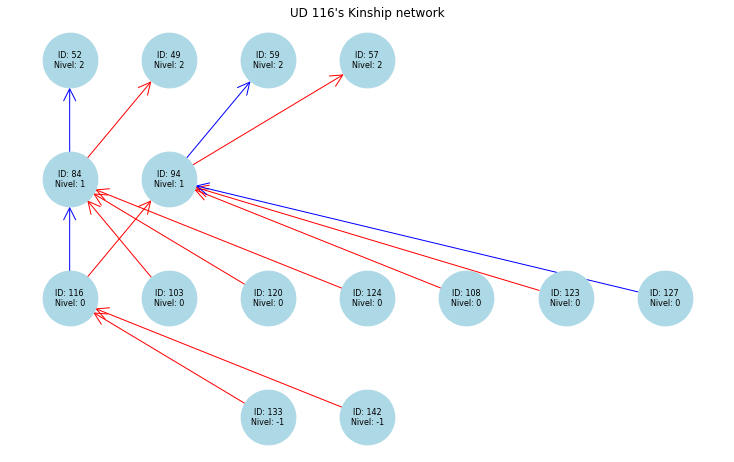

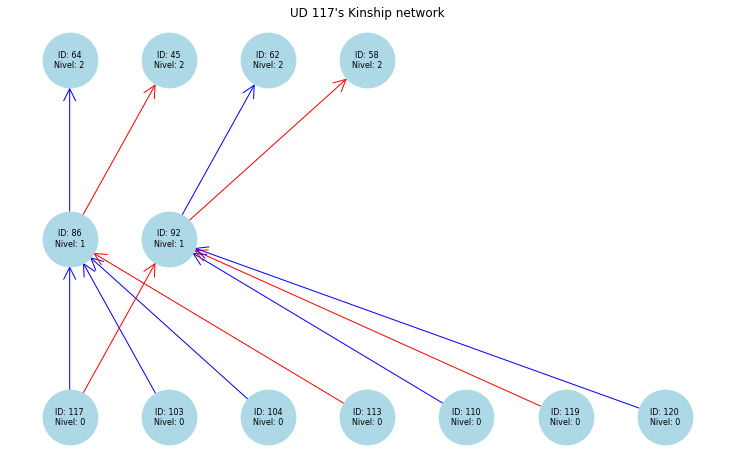

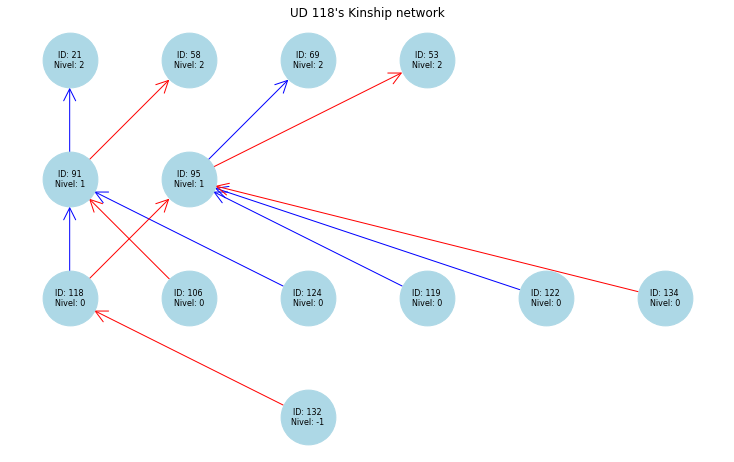

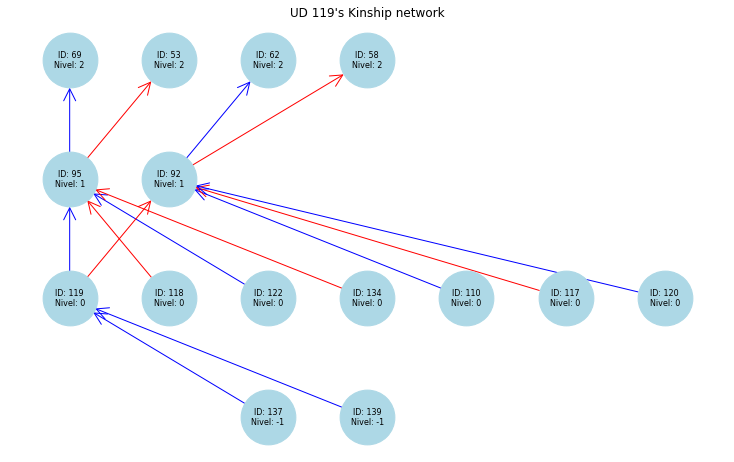

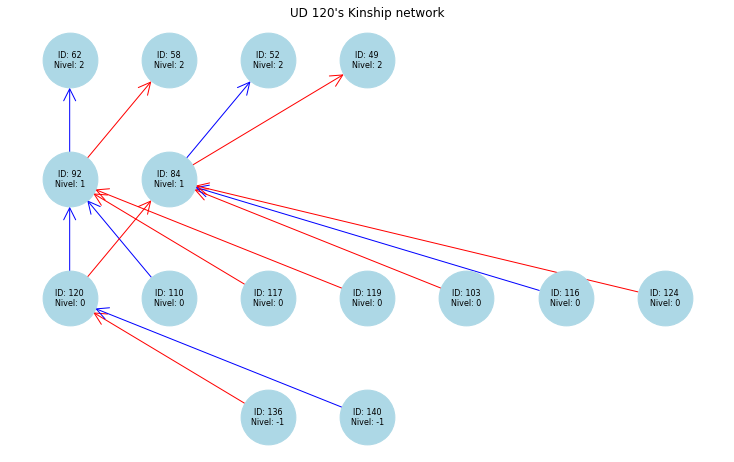

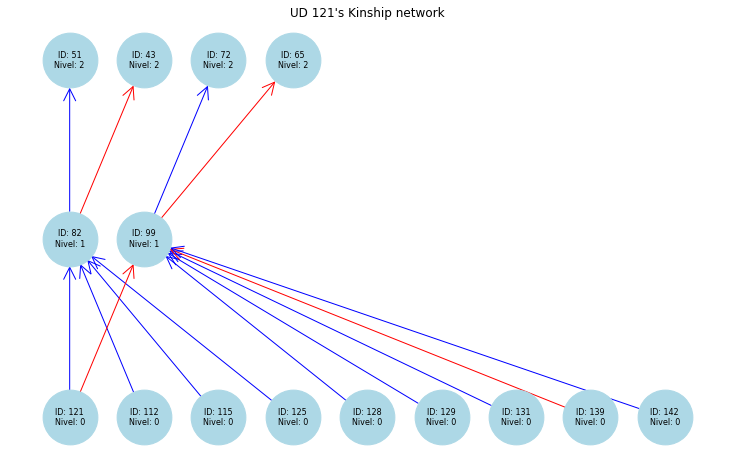

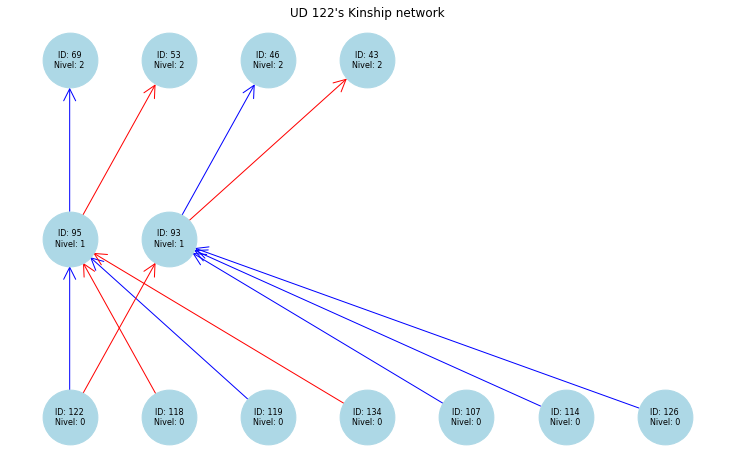

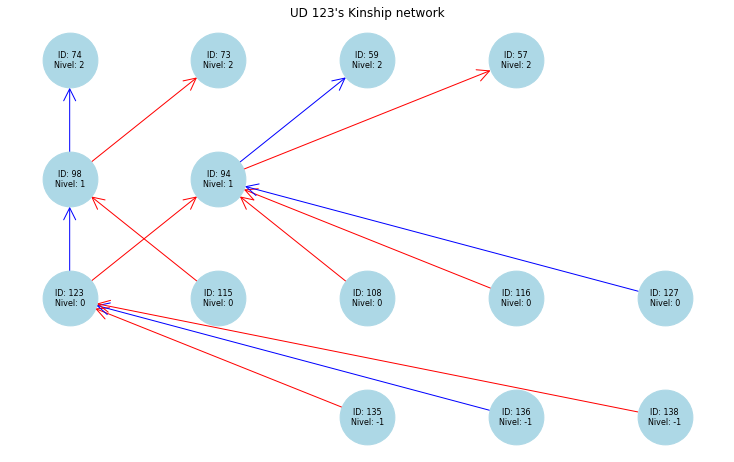

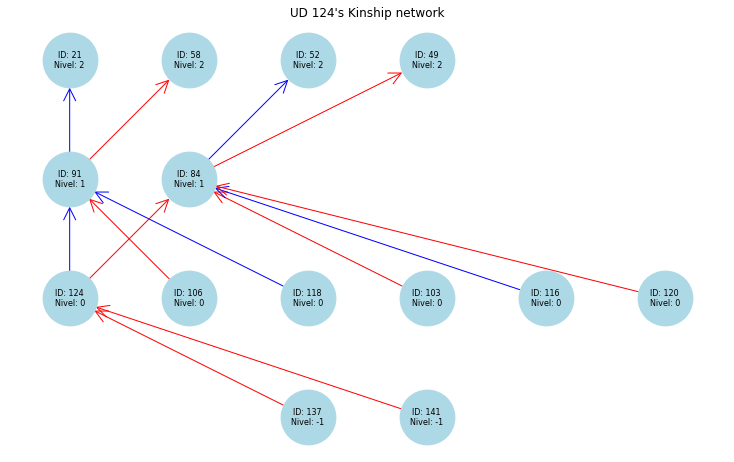

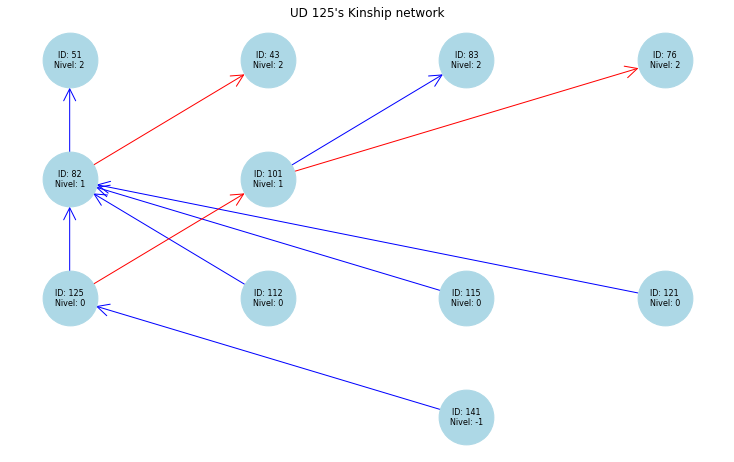

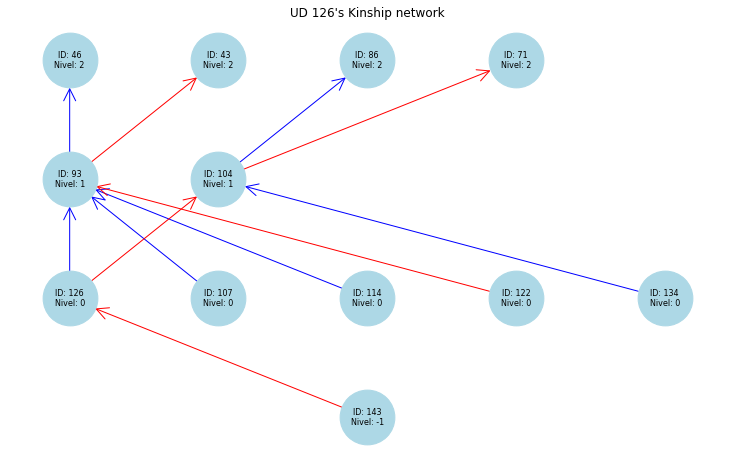

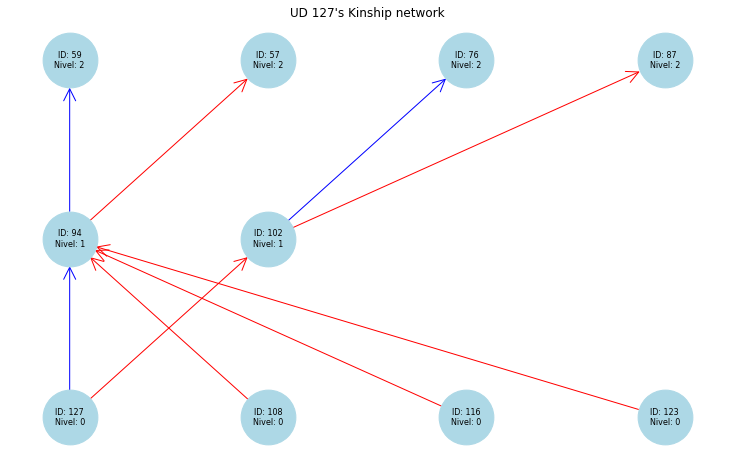

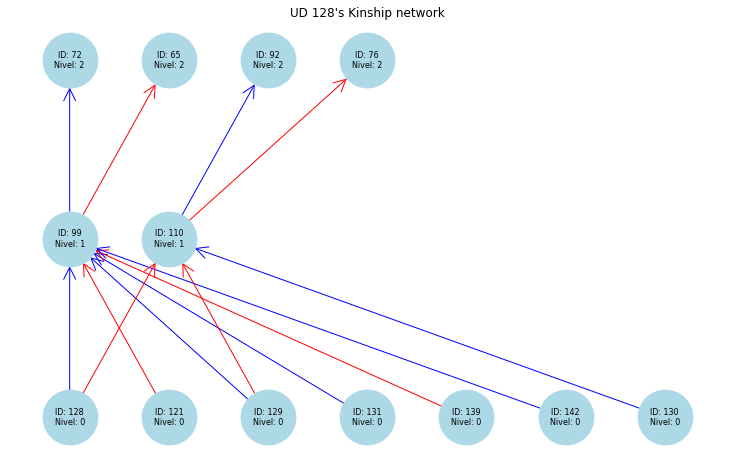

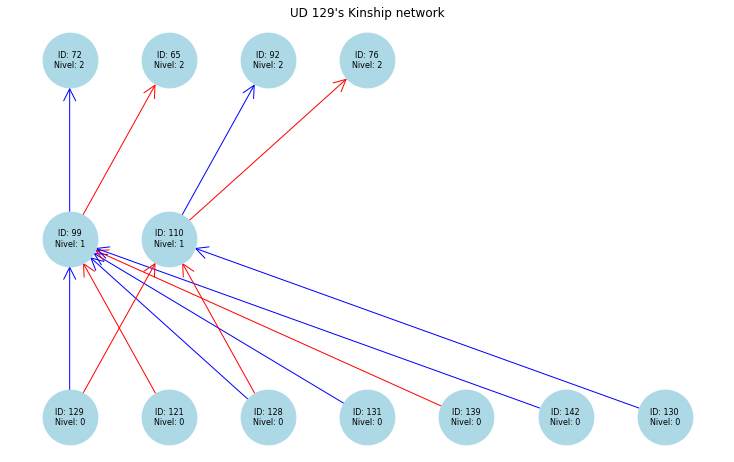

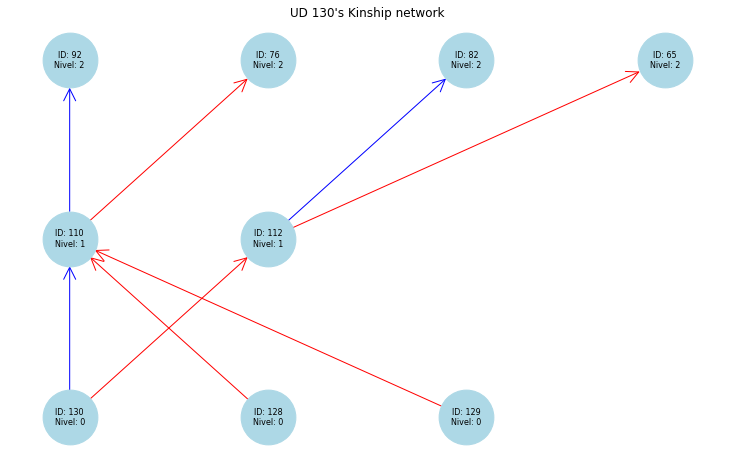

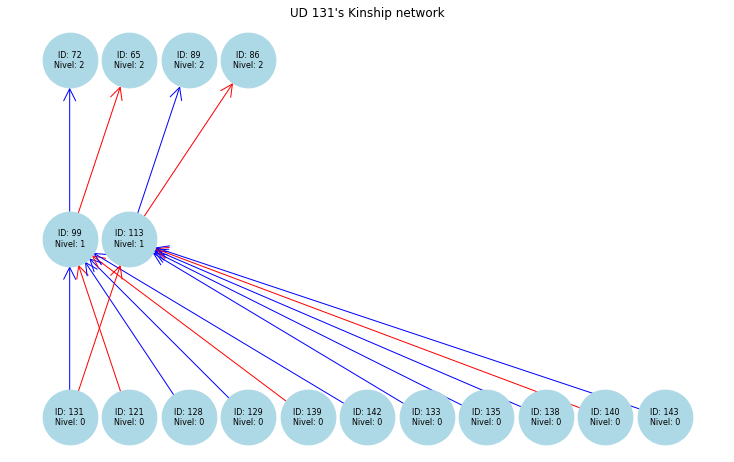

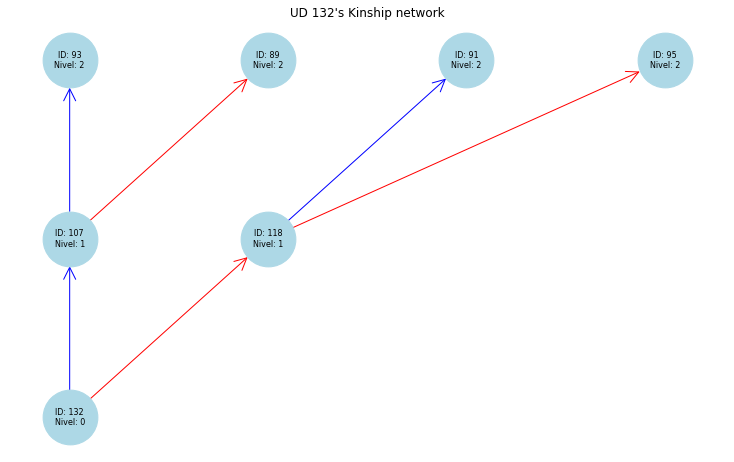

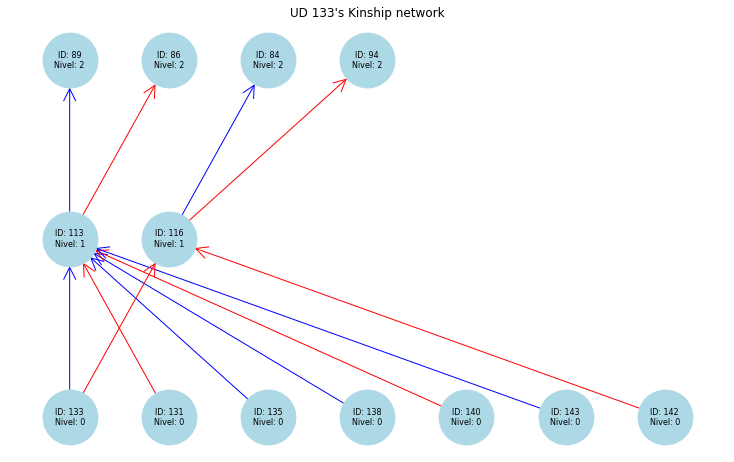

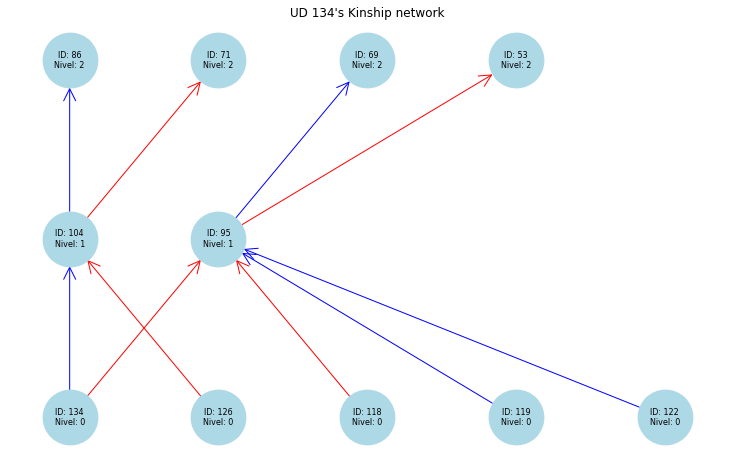

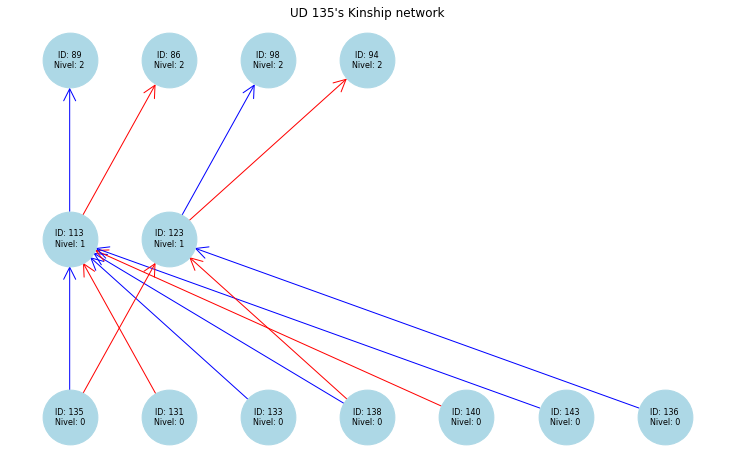

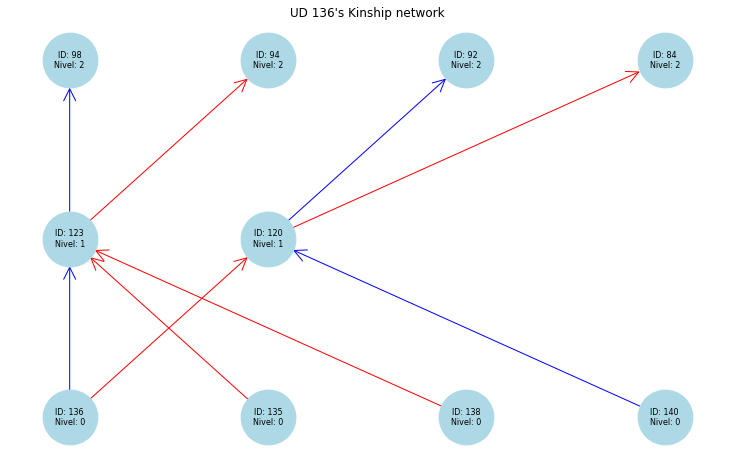

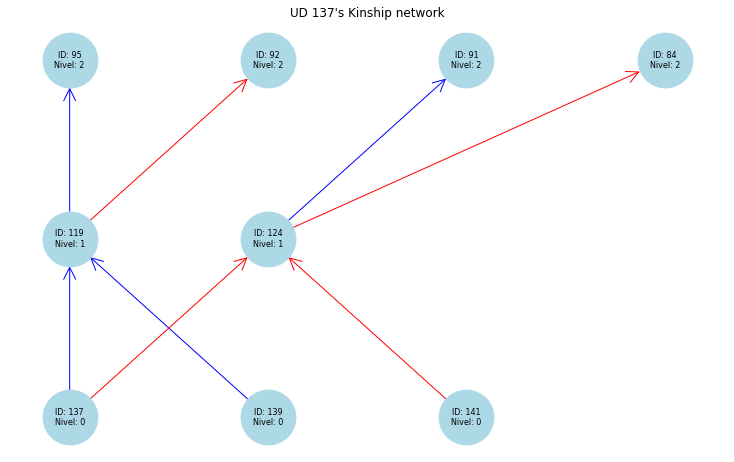

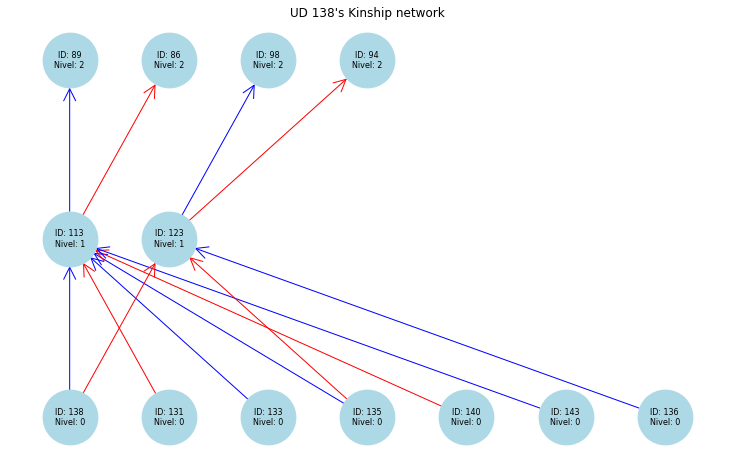

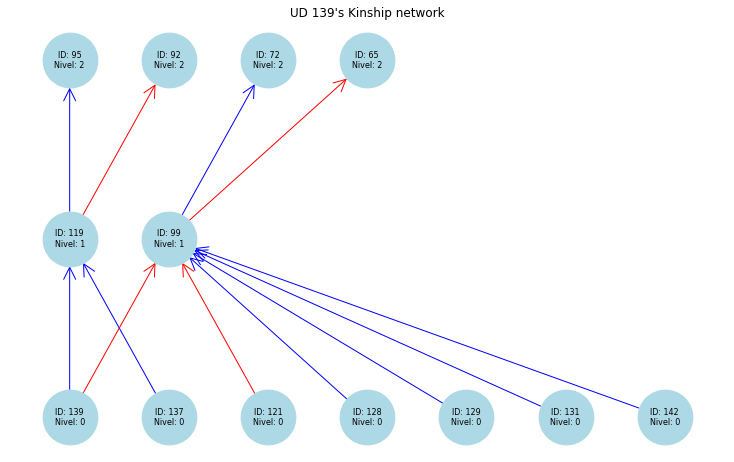

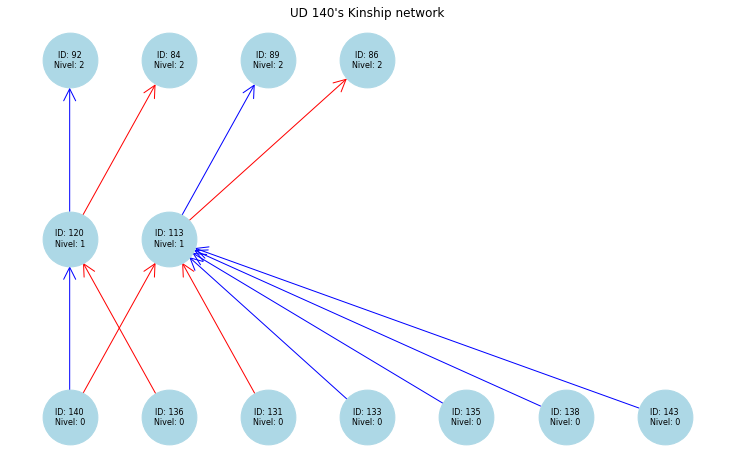

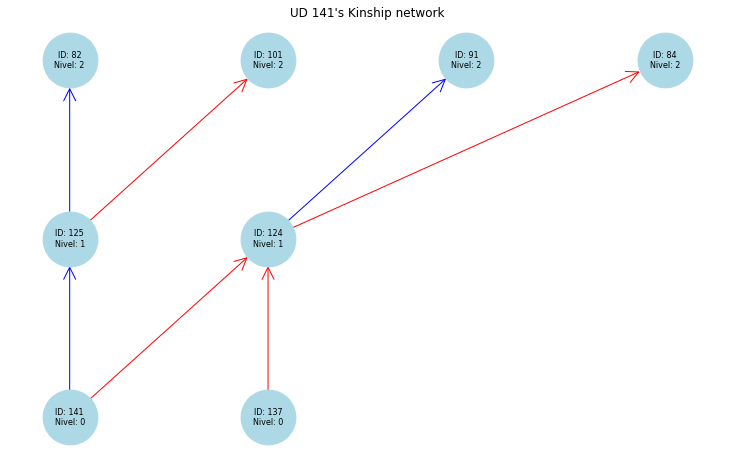

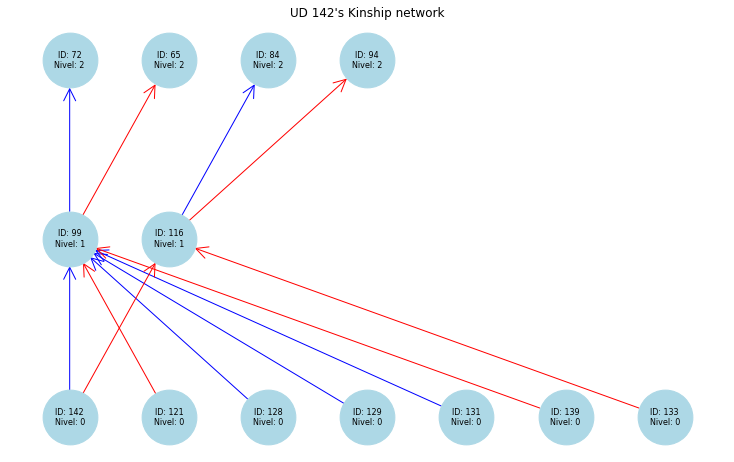

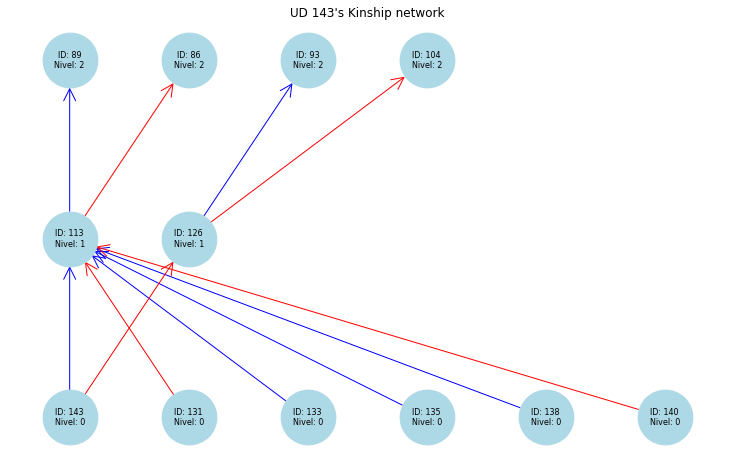

In [7]:
for id_ud, ud in UD.uds.items():
    small_ego_genealogy(ud)